# Video Game Socialization During the Pandemic

# Overview

This project looks at several sources of online socialization, such as games and streaming, and analyzes the change in consumption of these mediums over the course of the COVID pandemic. It primarily looks at the explicit number of people and the general growth in each segment, but selectively also focuses on the change in the growth as well, to see not only if the growth increased, but also to see if the rate of growth increased as well.

# Names

- Adrian Botvinik
- Belinda Yan
- Jennifer Wong
- Parisa Shahabi
- Sujal Nahata

<a id='research_question'></a>
# Research Question

Did the video game industry and community experience an increase in online socialization and interaction among players during the COVID-19 pandemic?

<a id='background'></a>

# Background & Prior Work

Even before the COVID-19 pandemic, video games have always been popular among teenagers as found by the Pew Research Center. However, during the pandemic, popularity for video games seem to have increased greatly, with the increased need to socialize with other people because of lockdown and social distancing measures[^hand]. This is because historically, video games have been a source of helping people to socialize and interact without the need to ever be in person[^lanhart] which is a reason why video game consumption and time spent on video games increased significantly during the pandemic[^clement], when people are not able to meet or see each other in person. However, we don’t know if there was an increase in socialization and interaction on video game servers and how much there was as a result of the increase in consumption. 

According to a study done on the effect of video games during the COVID-19 Pandemic and the effects on Player’s wellbeing, researchers found out that 63.1% answered that the types of games they play changed along with the frequency. They reported that players tend to prefer multiplayer games as a result of the pandemic, as well as considering the socialization aspect when choosing which game to play[^barr]. As the avenues of interaction with others decreased, people began turning to new forms of connection they had not sought before. A rise in video game consumption during the pandemic can also be attributed to the increase in people over the age of 60 joining the video game space, with a sugre of over 200% of this demographic in the global gaming marketplace[^radzięda]. While those above that age are not the typical audience of most video games, social distancing measures encouraged people to find new ways to keep in touch and have fun with their loved ones in lieu of the stay-at-home orders and restrictions on in-person gatherings.

[^hand]: Hand, C., Maciejewski, G., &amp; Ingram, J. (n.d.). Lockdown has impacted cognitive function - but socializing again can boost it. World Economic Forum. Retrieved October 24, 2022, from https://www.weforum.org/agenda/2021/04/lockdown-has-damaged-people-s-cognitive-function-but-socialising-can-bring-it-back/.
[^lanhart]: Lenhart, A. (2019, December 31). Chapter 3: Video Games are key elements in friendships for many boys. Pew Research Center: Internet, Science &amp; Tech. Retrieved October 24, 2022, from https://www.pewresearch.org/internet/2015/08/06/chapter-3-video-games-are-key-elements-in-friendships-for-many-boys/.
[^clement]: Clement, J. (2021, September 22). Growth in time spent gaming during COVID-19 worldwide 2020. Statista. Retrieved October 24, 2022, from https://www.statista.com/statistics/1188545/gaming-time-spent-covid/.
[^barr]: Barr, M. (n.d.). Playing video games during the COVID-19 pandemic and ... Sage Journals. Retrieved October 24, 2022, from https://journals.sagepub.com/doi/full/10.1177/15554120211017036.
[^radzięda]: Radzięda, P. (2020, June 22). Lockdown sees the rise of over 60s gamers, G2a Data reveals. G2A.COM - Official Corporate Website. Retrieved October 24, 2022, from https://www.g2a.co/lockdown-sees-the-rise-of-over-60s-gamers-g2a-data-reveals/.

# Hypothesis


We hypothesize that the pandemic led to an increase in interconnectedness within the video game community. We speculate this because the pandemic led to a huge increase in the amount of time spent indoors and in one’s own home, and stay-at-home orders restricted people’s ability to interact with others. We think that since COVID-19 led to an increase in feelings of isolation and alienation from one another, video game players would be more likely to want to decrease those negative emotions and effects from lack of human interaction by using video games and its community as a way to stay connected with other people. This would be seen in an increase in multiplayer game sales, as well as an increase in people joining and talking in servers, and participation in video game streaming videos.

# Setup

In [5]:
%matplotlib inline

from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

fortnite_url = 'https://activeplayer.io/fortnite/'
league_of_legends_url = 'https://activeplayer.io/league-of-legends/'
amongus_url='https://activeplayer.io/among-us/'
minecraft_url='https://activeplayer.io/minecraft/'
grandtheft_url='https://activeplayer.io/grand-theft-auto-v/'
dota2_url='https://activeplayer.io/dota-2/'
rocketleague_url='https://activeplayer.io/rocket-league/'
SteamData = pd.read_csv('./Data Files/SteamMonthlyUserData.csv')
TwitchUsage = pd.read_csv('./Data Files/Twitch.csv')

# Make printing dataframes less cluttered
pd.set_option('display.max_rows', 10)

# Dataset(s)

## Twitch Dataset

- Dataset Name: TwitchUsage
- Link to the dataset: https://streamscharts.com/overview
- Number of Observations: 480

Twitch Usage gives detailed analytics of Twitch viewership over time, between the years 2018 and up to 2022. This data set provides a monthly quantitative report of many aspects of viewership and platform usage: Active Channels, Peak Viewers, Peak Channels, Average Viewers, Average Channels, Hours Watched, and Games Streamed.

In [6]:
TwitchUsage

,Month,Active\nChannels,Peak\nViewers,Peak\nChannels,Average\nViewers,Average\nChannels,Hours\nWatched,Games\nStreamed
0,January 2018,-,2 250 930,38 087,908 715,23 614,675 932 328,-
1,February 2018,-,1 635 678,41 309,855 838,25 443,574 980 476,-
2,March 2018,-,2 355 498,49 300,903 238,28 041,672 008 754,-
3,April 2018,-,1 874 549,47 126,942 061,29 273,677 498 490,-
4,May 2018,-,1 600 804,45 382,949 242,28 691,706 077 686,-
...,...,...,...,...,...,...,...,...
54,July 2022,3 791 900,4 475 269,130 065,2 535 680,90 491,1 884 854 708,36 172
55,August 2022,5 035 460,6 342 834,168 149,2 609 537,89 992,1 939 755 464,40 116
56,September 2022,4 630 281,4 649 533,132 988,2 506 029,86 308,1 803 922 948,39 398
57,October 2022,4 517 156,4 606 001,130 487,2 515 356,86 442,1 858 009 320,38 987


## Steam Dataset

- Dataset Name: SteamDB
- Link to the dataset: https://steamdb.info/app/753/graphs/ 
- Number of observations: 213

SteamDB provides a number of datasets to track activity within games and overall on Steam. The dataset imported here is the data containing lifetime monthly statistics on Steam online users, as well as data on how many people are ingame on Steam. We will split the dataset into two different dataframes, so that we can separately track In Game peaks as well as Steam online averages.


In [7]:
SteamData

,MONTH,PEAK,GAIN,% GAIN,MIN DAILY PEAK,AVG DAILY PEAK,IN-GAME PEAK
0,Last 30 days,"30,239,878","1,119,127",3.80%,"25,425,649","27,389,076","8,920,824"
1,Sep-22,"29,120,751","1,426,070",5.10%,"25,360,106","26,695,951","8,627,087"
2,Aug-22,"27,694,681","16,352",0.10%,"25,006,438","25,947,697","8,177,516"
3,Jul-22,"27,678,329","-415,672",-1.50%,"25,040,232","25,990,647","8,166,327"
4,Jun-22,"28,094,001","-274,562",-1.00%,"25,202,293","26,604,672","8,318,044"
...,...,...,...,...,...,...,...
209,Aug-04,"156,737","44,679",39.90%,"119,866","133,564",-
210,Jul-04,"112,058","-5,744",-4.90%,"98,571","106,723",-
211,Jun-04,"117,802","20,322",20.80%,"93,481","105,943",-
212,Apr-04,"97,480","12,482",14.70%,"93,635","95,558",-


## League of Legends Dataset

- Dataset Name: League of Legends Usage Dataset
- Link to the dataset: https://activeplayer.io/league-of-legends/
- Number of observations: 40

This dataset contains the average player count and average player gain or loss for each month from June 2019 to October 2022 for the game, League of Legends.

We are planning to combine the datasets: League of Legends dataset, Fortnite Usage Dataset, Among Us Usage Dataset, Minecraft Usage Dataset, Grand Theft Auto V Usage Dataset, Rocket League Usage Dataset, and Dota 2 Usage Dataset. Since the layout of all these datasets are the same, we plan to merge all these together, keeping only the months in common over all these datasets.


In [11]:
leagueoflegends_response = requests.get(league_of_legends_url)
leagueoflegends_soup = BeautifulSoup(leagueoflegends_response.text, 'html.parser')
data_list = []
table = leagueoflegends_soup.find('table', id = 'table_3')
for row in table.find_all('tr')[2:]:
    entry = {}
    col = row.find_all('td')
    if col:
        entry['month'] = col[0].string.strip()
        entry['average_monthly_players'] = col[1].string.strip()
        entry['monthly_gain_loss'] = col[2].string
    columns = {'month': entry['month'], 'average_monthly_players': entry['average_monthly_players'], 'monthly_gain_loss': entry['monthly_gain_loss']}
    data_list.append(columns)
leagueoflegends_df = pd.DataFrame(data_list)[:40]
leagueoflegends_df

,month,average_monthly_players,monthly_gain_loss
0,"November 30, 2022","149,980,576","-928,184"
1,"October 30, 2022","150,908,760","-193,595"
2,"September 30, 2022","151,102,355","972,337"
3,"August 30, 2022","150,130,018","223,228"
4,"July 30, 2022","149,906,790","-1,374,568"
...,...,...,...
35,"December 30, 2020","124,937,212","8,925,288"
36,"November 30, 2019","116,011,924","8,154,210"
37,"October 30, 2019","107,857,714","1,570,368"
38,"September 30, 2019","106,287,346","4,049,307"


## Fortnite Dataset

- Dataset Name: Fortnite Usage Dataset
- Link to the dataset: https://activeplayer.io/fortnite/
- Number of observations: 41

This dataset contains the average player count and average player gain or loss for each month from June 2019 to October 2022 for the game, Fortnite.

We are planning to combine the datasets: League of Legends Dataset Fortnite Usage Dataset, Among Us Usage Dataset, Minecraft Usage Dataset, Grand Theft Auto V Usage Dataset, Rocket League Usage Dataset, and Dota 2 Usage Dataset. Since the layout of all these datasets are the same, we plan to merge all these together, keeping only the months in common over all these datasets.


In [13]:
fortnite_response = requests.get(fortnite_url)
fortnite_soup = BeautifulSoup(fortnite_response.text, 'html.parser')
table = fortnite_soup.find('table', id = 'table_3')
month_list = []
game = {}
average_players = []
monthly_gain_loss = []

# grabs all the data found on the website and adds to a dictionary
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if cols:
        game['Month'] = cols[0].string.strip()
        game['Average Monthly Players'] = cols[1].string.strip()
        game['Monthly Gain / Loss'] = cols[2].string.strip()
    if len(game) != 0:
        month_list.append(game['Month'])
        average_players.append(game['Average Monthly Players'])
        monthly_gain_loss.append(game['Monthly Gain / Loss'])
        
# adds all the data scrapped to a new dataframe
fortnite_df = pd.DataFrame()
fortnite_df = fortnite_df.assign(month = month_list, average_monthly_players = average_players, monthly_gain_loss = monthly_gain_loss)
fortnite_df

,month,average_monthly_players,monthly_gain_loss
0,Last 30 Days,"251,656,507","1,511,751"
1,"November 30, 2022","250,144,756","-880,842"
2,"October 30, 2022","251,025,598","-2,539,412"
3,"September 30, 2022","253,565,010","-3,839,113"
4,"August 30, 2022","257,404,123","2,389,710"
...,...,...,...
39,"October 30, 2019","163,675,728","-10,109,383"
40,"September 30, 2019","173,785,111","8,689,256"
41,"August 30, 2019","165,095,856","18,004,138"
42,"July 30, 2019","147,091,718","-46,365,868"


## Among Us Dataset

- Dataset Name: Among Us Usage Dataset
- Link to the dataset: https://activeplayer.io/among-us/
- Number of observations: 40

This dataset contains the average player count and average player gain or loss for each month from June 2019 to October 2022 for the game, Among Us.

We are planning to combine the datasets: League of Legends Dataset Fortnite Usage Dataset, Among Us Usage Dataset, Minecraft Usage Dataset, Grand Theft Auto V Usage Dataset, Rocket League Usage Dataset, and Dota 2 Usage Dataset. Since the layout of all these datasets are the same, we plan to merge all these together, keeping only the months in common over all these datasets.


In [14]:
amongus_response = requests.get(amongus_url)
amongus_soup = BeautifulSoup(amongus_response.text, 'html.parser')
data_list = []
table = amongus_soup.find('table', id = 'table_2')
for row in table.find_all('tr')[2:]:
    entry = {}
    col = row.find_all('td')
    if col:
        entry['month'] = col[0].string.strip()
        entry['average_monthly_players'] = col[1].string.strip().split('.')[0]
        entry['monthly_gain_loss'] = col[2].string
    columns = {'month': entry['month'], 'average_monthly_players': entry['average_monthly_players'], 'monthly_gain_loss': entry['monthly_gain_loss']}
    data_list.append(columns)
amongus_df = pd.DataFrame(data_list)[:40]
amongus_df

,month,average_monthly_players,monthly_gain_loss
0,November 30 2022,"101,805,541","-10,700,237"
1,"October 30, 2022","112,505,778","-40,139,539"
2,"September 30, 2022","152,645,317","-8,259,862"
3,"August 30, 2022","160,905,179","-17,239,258"
4,"July 30, 2022","178,144,436","-1,843,998"
...,...,...,...
35,"December 30, 2020","96,451,113","9,648,041"
36,"November 30, 2019","86,803,072","1,858,056"
37,"October 30, 2019","84,945,016","4,791,130"
38,"September 30, 2019","80,153,887","-8,662,362"


## Minecraft Dataset

- Dataset Name:Minecraft Usage Dataset
- Link to the dataset: https://activeplayer.io/minecraft/ 
- Number of observations: 40

This dataset contains the average player count and average player gain or loss for each month from June 2019 to October 2022 for the game, Minecraft.

We are planning to combine the datasets: League of Legends Dataset Fortnite Usage Dataset, Among Us Usage Dataset, Minecraft Usage Dataset, Grand Theft Auto V Usage Dataset, Rocket League Usage Dataset, and Dota 2 Usage Dataset. Since the layout of all these datasets are the same, we plan to merge all these together, keeping only the months in common over all these datasets.


In [15]:
minecraft_response = requests.get(minecraft_url)
minecraft_soup = BeautifulSoup(minecraft_response.text, 'html.parser')
data_list = []
table = minecraft_soup.find('table', id = 'table_3')
for row in table.find_all('tr')[2:]:
    entry = {}
    col = row.find_all('td')
    if col:
        entry['month'] = col[0].string.strip()
        entry['average_monthly_players'] = col[1].string.strip()
        entry['monthly_gain_loss'] = col[2].string
    columns = {'month': entry['month'], 'average_monthly_players': entry['average_monthly_players'], 'monthly_gain_loss': entry['monthly_gain_loss']}
    data_list.append(columns)
minecraft_df = pd.DataFrame(data_list)
minecraft_df

,month,average_monthly_players,monthly_gain_loss
0,"November 30, 2022","171,805,540","-160,514"
1,"October 30, 2022","171,966,054","-889,962"
2,"September 30, 2022","172,856,016","-246,100"
3,"August 30, 2022","173,102,116","452,000"
4,"July 30, 2022","172,650,116","635,657"
...,...,...,...
38,"October 30, 2019","68,743,806","4,245,941"
39,"September 30, 2019","72,989,747","-3,649,487"
40,"August 30, 2019","69,340,259","-7,561,738"
41,"July 30, 2019","61,778,522","-1,251,980"


## Grand Theft Auto V Dataset

- Dataset Name: Grand Theft Auto V Usage Dataset
- Link to the dataset: https://activeplayer.io/grand-theft-auto-v/ 
- Number of observations: 40

This dataset contains the average player count and average player gain or loss for each month from June 2019 to October 2022 for the game, Grand Theft Auto V.

We are planning to combine the datasets: League of Legends Dataset Fortnite Usage Dataset, Among Us Usage Dataset, Minecraft Usage Dataset, Grand Theft Auto V Usage Dataset, Rocket League Usage Dataset, and Dota 2 Usage Dataset. Since the layout of all these datasets are the same, we plan to merge all these together, keeping only the months in common over all these datasets.


In [16]:
grandtheft_response = requests.get(grandtheft_url)
grandtheft_soup = BeautifulSoup(grandtheft_response.text, 'html.parser')
data_list = []
table = grandtheft_soup.find('table', id = 'table_2')
for row in table.find_all('tr')[2:]:
    entry = {}
    col = row.find_all('td')
    if col:
        entry['month'] = col[0].string.strip()
        entry['average_monthly_players'] = col[1].string.strip()
        entry['monthly_gain_loss'] = col[2].string
    columns = {'month': entry['month'], 'average_monthly_players': entry['average_monthly_players'], 'monthly_gain_loss': entry['monthly_gain_loss']}
    data_list.append(columns)
grandtheft_df = pd.DataFrame(data_list)[:40]
grandtheft_df

,month,average_monthly_players,monthly_gain_loss
0,"November 30, 2022","17,669,908","-178,673"
1,"October 30, 2022","17,848,581","951,015"
2,"September 30, 2022","16,897,566","265,506"
3,"August 30, 2022","16,632,060","1,014,836"
4,"July 30, 2022","15,617,225","301,965"
...,...,...,...
35,"December 30, 2020","13,375,604","-308,433"
36,"November 30, 2019","13,684,036","-73,355"
37,"October 30, 2019","13,757,391","-161,197"
38,"September 30, 2019","13,918,588","-61,522"


## Rocket League Dataset

- Dataset Name: Rocket League Usage Dataset
- Link to the dataset: https://activeplayer.io/rocket-league/
- Number of observations: 40

This dataset contains the average player count and average player gain or loss for each month from June 2019 to October 2022 for the game, Rocket League.

We are planning to combine the datasets: League of Legends Dataset Fortnite Usage Dataset, Among Us Usage Dataset, Minecraft Usage Dataset, Grand Theft Auto V Usage Dataset, Rocket League Usage Dataset, and Dota 2 Usage Dataset. Since the layout of all these datasets are the same, we plan to merge all these together, keeping only the months in common over all these datasets.

In [17]:
rocketleague_response = requests.get(rocketleague_url)
rocketleague_soup = BeautifulSoup(rocketleague_response.text, 'html.parser')
data_list = []
table = rocketleague_soup.find('table', id = 'table_2')
for row in table.find_all('tr')[2:]:
    entry = {}
    col = row.find_all('td')
    if col:
        entry['month'] = col[0].string.strip()
        entry['average_monthly_players'] = col[1].string.strip()
        entry['monthly_gain_loss'] = col[2].string
    columns = {'month': entry['month'], 'average_monthly_players': entry['average_monthly_players'], 'monthly_gain_loss': entry['monthly_gain_loss']}
    data_list.append(columns)
rocketleague_df = pd.DataFrame(data_list)[:40]
rocketleague_df

,month,average_monthly_players,monthly_gain_loss
0,"November 30, 2022","87,233,560","178,104"
1,"October 30, 2022","87,055,456","200,440"
2,"September 30, 2022","86,855,016","-53,854"
3,"August 30, 2022","86,908,870","219,069"
4,"July 30, 2022","86,689,801","-3,091,065"
...,...,...,...
35,"December 30, 2020","64,980,000","9,576,000"
36,"November 30, 2019","55,404,000","3,299,616"
37,"October 30, 2019","52,104,384","11,185,452"
38,"September 30, 2019","40,918,932","-2,527,346"


## Dota2 Dataset

- Dataset Name: Dota2 Usage Dataset
- Link to the dataset: https://activeplayer.io/dota-2/
- Number of observations: 40

This dataset contains the average player count and average player gain or loss for each month from June 2019 to October 2022 for the game, Dota 2.

We are planning to combine the datasets: League of Legends Dataset Fortnite Usage Dataset, Among Us Usage Dataset, Minecraft Usage Dataset, Grand Theft Auto V Usage Dataset, Rocket League Usage Dataset, and Dota 2 Usage Dataset. Since the layout of all these datasets are the same, we plan to merge all these together, keeping only the months in common over all these datasets.

In [19]:
dota2_response = requests.get(dota2_url)
dota2_soup = BeautifulSoup(dota2_response.text, 'html.parser')
data_list = []
table = dota2_soup.find('table', id = 'table_3')
for row in table.find_all('tr')[2:]:
    entry = {}
    col = row.find_all('td')
    if col:
        entry['month'] = col[0].string.strip()
        entry['average_monthly_players'] = col[1].string.strip()
        entry['monthly_gain_loss'] = col[2].string
    columns = {'month': entry['month'], 'average_monthly_players': entry['average_monthly_players'], 'monthly_gain_loss': entry['monthly_gain_loss']}
    data_list.append(columns)
dota2_df = pd.DataFrame(data_list)[:40]
dota2_df

,month,average_monthly_players,monthly_gain_loss
0,November 30 2022,"14,520,350","970,139"
1,"October 30, 2022","13,550,211","2,043,166"
2,"September 30, 2022","11,507,045","30,910"
3,"August 30, 2022","11,476,135","215,530"
4,"July 30, 2022","11,260,605","196,964"
...,...,...,...
35,"December 30, 2020","9,039,071","-18,142"
36,"November 30, 2019","9,111,639","13,018"
37,"October 30, 2019","9,059,567","-33,112"
38,"September 30, 2019","9,192,015","-44,792"


# Data Cleaning

## Steam Player Dataset

1. First, irrelevant data columns in the dataframe were dropped, only keeping the average values in our data. This is because we believe the average values are a more accurate representation of the platform's usage data, whereas peak values could reflect an anomaly.
2. Next, the remaining columns were renamed in a way that is more accessible for the proceeding code.
3. For our data, we dropping all rows pertaining to information that dates before 2016.
4. At this point, the numerical values in our Steam dataframe are string objects. We then removed spaces and commas in these strings and then casted these object to int values so that we could graph it properly. This was applied to the average monthly viewer column
5. We finished by reordering the data to to be chronological, and reset the indices again

In [20]:
SteamInGameData = SteamData.drop(['PEAK', '% GAIN', 'MIN DAILY PEAK', 'AVG DAILY PEAK', 'GAIN'], axis=1)
SteamData = SteamData.drop(['PEAK', '% GAIN', 'MIN DAILY PEAK', 'IN-GAME PEAK'], axis=1)

# Consolidate new dataframes
SteamData = SteamData[['MONTH', 'AVG DAILY PEAK', 'GAIN']]
SteamInGameData = SteamInGameData[['MONTH', 'IN-GAME PEAK']]

# Rename for consistency with other datasets
SteamData = SteamData.rename({'MONTH': 'month', 
                              'AVG DAILY PEAK': 'average_monthly_players', 
                              'GAIN': 'monthly_gain_loss'}, axis=1)

SteamInGameData = SteamInGameData.rename({'MONTH': 'month', 
                                          'IN-GAME PEAK': 'in_game_peak'}, axis=1)

SteamData.at[0,'month'] = 'Oct-22'
SteamInGameData.at[0,'month'] = 'Oct-22'

# Conistent Monthly Data only starts June 2004, remove the rows before that
SteamData = SteamData[SteamData.month != 'Jan-04']
SteamData = SteamData[SteamData.month != 'Apr-04']

# Remove blank values from in game data
SteamInGameData = SteamInGameData[SteamInGameData.in_game_peak != '-']

# Reformat entries into integer type variables
SteamData['average_monthly_players'] = SteamData['average_monthly_players'].str.replace('[^\w\s]','')
SteamData['average_monthly_players'] = SteamData['average_monthly_players'].astype(int)
SteamData = SteamData[::-1].reset_index(drop = True)

SteamData = SteamData[SteamData[SteamData.month == 'Sep-16'].index[0]:]
SteamData = SteamData.reset_index(drop = True)
SteamData

,month,average_monthly_players,monthly_gain_loss
0,Sep-16,11318185,"602,874"
1,Oct-16,11674671,"522,415"
2,Nov-16,12140552,"584,793"
3,Dec-16,12583704,"24,256"
4,Jan-17,12988283,"680,400"
...,...,...,...
69,Jun-22,26604672,"-274,562"
70,Jul-22,25990647,"-415,672"
71,Aug-22,25947697,"16,352"
72,Sep-22,26695951,"1,426,070"


## Twitch Data Set


### Twitch Data Cleaning Steps: 

1. First, irrelevant data columns in the dataframe were dropped, only keeping the average values in our data. This is because we believe the average values are a more accurate representation of the platform's usage data, whereas peak values could reflect an anomaly. 
2. Next, the remaining columns were renamed in a way that is more accessible for the proceeding code. 
3. For our data, we dropping all rows pertaining to information that dates before July 2019 and after October 2022, and the indexes were reset. This is so that we can keep a consistent range/timeline across our data sets. The remaining rows were set into a new dataframe to be subsequently used.
4. At this point, the numerical values in our Twitch dataframe are string objects. We then removed spaces in these strings and then casted these object to int values so that we could graph it properly. This was applied to the three columns of data in our data set: Average Viewers, Average Channels, and Hours Watched.




In [21]:
#Removed irrelevant columns Active Channels,  Peak Viewers, Peak Channels, Games Streamed
TwitchUsage = TwitchUsage.drop(['Active\nChannels', 'Peak\nViewers', 'Peak\nChannels', 'Games\nStreamed'], axis=1)

#Renamed remaining columns for easier use in future code analyses
TwitchUsage = TwitchUsage.rename({'Average\nViewers': 'Average_Viewers','Average\nChannels':'Average_Channels', 'Hours\nWatched':'Hours_Watched'},axis=1)
TwitchUsage

,Month,Average_Viewers,Average_Channels,Hours_Watched
0,January 2018,908 715,23 614,675 932 328
1,February 2018,855 838,25 443,574 980 476
2,March 2018,903 238,28 041,672 008 754
3,April 2018,942 061,29 273,677 498 490
4,May 2018,949 242,28 691,706 077 686
...,...,...,...,...
54,July 2022,2 535 680,90 491,1 884 854 708
55,August 2022,2 609 537,89 992,1 939 755 464
56,September 2022,2 506 029,86 308,1 803 922 948
57,October 2022,2 515 356,86 442,1 858 009 320


In [22]:
# Removed all data before July 2019 and after October 2022 for consistency with other data sets 
TwitchUsage2 = TwitchUsage.drop(TwitchUsage.index[:18],axis = 0).drop(TwitchUsage.index[58],axis = 0, inplace= False)
# Reset index and set this as a new data frame to be used in analysis
TwitchUsage2 = TwitchUsage2.reset_index()
TwitchUsage2

,index,Month,Average_Viewers,Average_Channels,Hours_Watched
0,18,July 2019,1 121 432,34 679,834 157 880
1,19,August 2019,1 234 772,35 248,912 290 538
2,20,September 2019,1 125 340,33 621,714 215 327
3,21,October 2019,1 146 246,34 606,651 831 757
4,22,November 2019,1 197 990,40 008,855 963 314
...,...,...,...,...,...
35,53,June 2022,2 540 971,86 889,1 823 993 688
36,54,July 2022,2 535 680,90 491,1 884 854 708
37,55,August 2022,2 609 537,89 992,1 939 755 464
38,56,September 2022,2 506 029,86 308,1 803 922 948


In [23]:
#Remove spaces and convert string object into integers for each column of data

TwitchUsage2['Average_Viewers'] = TwitchUsage2['Average_Viewers'].str.replace(' ','')
TwitchUsage2['Average_Viewers'] = TwitchUsage2['Average_Viewers'].astype(int)

TwitchUsage2['Average_Channels'] = TwitchUsage2['Average_Channels'].str.replace(' ','')
TwitchUsage2['Average_Channels'] = TwitchUsage2['Average_Channels'].astype(int)

TwitchUsage2['Hours_Watched'] = TwitchUsage2['Hours_Watched'].str.replace(' ','')
TwitchUsage2['Hours_Watched'] = TwitchUsage2['Hours_Watched'].astype(int)

## Games Datasets

This includes all games datasets:
- Fortnite
- League of Legends
- Among Us
- Minecraft
- Grand Theft Auto V
- Rocket League
- Dota 2

The cleaning for all these datasets are in their corresponding subsections below.

Note: For our analysis, we will be focusing on the data from 03-30-2020 to 03-30-2022.

Steps:

We cleaned the data for the Fortnite, League of Legends, Among, Us, Minecraft, Grand Theft Auto, Rocket League, and Dota 2 datasets. We accomplished this using the following steps:
    
1. We used the package BeautifulSoup to extract data from each dataset from https://urldefense.com/v3/__https://activeplayer.io__;!!Mih3wA!HHiJwZzBEKC0BKn3azdgQzxhUemu34D_cDdU1b-8xj1U0Gg_99ZtG4NbTQMFKuguWdbrrz964YPgdi5S$ . We then parsed the HTML code for each game data on the website to find out where all the data in the tables and row entries were, and used a for loop to collect all the values in those table rows and entries and put them in a data frame with only the columns month, average_monthly_players, and monthly_gain_loss. This resulted in 7 dataframes, each containing data for each game we are analyzing.
2. We cleaned each dataframe by converting each date in the month column to a datetime object, as well as removing the commas in the average_monthly_players and monthly_gain_loss columns and converting all those numbers into integers.
3. We created new dataframes called average_monthly where we merged all the average_monthly_players columns from all the different dataframes together and monthly_gain_loss where we merged all the monthly_gain_loss columns from all the different dataframes together. This resulted in 2 merged dataframes where one had all the data for the average number of monthly players for each game and one where it had all the data for the total monthly gains or losses of each game during the pandemic. We also created a new data frame called monthly_gain_loss_percentage where we merged all the data and calculated the percentage of gain and loss for each video game during the pandemic.

We will use these two functions to convert the player count columns to int and month columns to DataTime objects:

In [24]:
#converts a string to an int
def convert_to_int(str_input):
    output = str_input.replace(',', '')
    return int(output)

#converts a string date into a datetime object
def convert_to_date(str_input):
    if ',' in str_input:
        output = datetime.strptime(str_input, '%B %d, %Y')
    else:
        output = datetime.strptime(str_input, '%B %d %Y')
    return output

We noticed our Fortnite and Minecraft datasets have a duplicate entry for 2020-05-30. We will be using this function to recalculate the `average_monthly_players` and `monthly_gain_loss` columns after removing one of the duplicates.

In [25]:
# recalculates the average_monthly_players and monthly_gain_loss columns
def recalculate(to_clean_input):
    index = len(to_clean_input) - 1
    changed = []  
    while index > 0:
        changed.append(to_clean_input.iloc[index] - to_clean_input.iloc[index - 1])
        index -= 1
    return changed

### Fortnite Dataset

Cleaned the Fortnite data and put it in a dataframe with columns for the month, the average monthly players, and the monthly gain/loss.

##### Note:
We found a duplicate duplicate entry for `2020-05-30`. Hence, we had to recalculate the `average_monthly_players` and `monthly_gain_loss` columns for this dataset.

In [26]:
fortnite_df = fortnite_df.iloc[1:]
fortnite_df['average_monthly_players'] = fortnite_df['average_monthly_players'].apply(convert_to_int)
fortnite_df['monthly_gain_loss'] = fortnite_df['monthly_gain_loss'].apply(convert_to_int)
fortnite_df['month'] = fortnite_df['month'].apply(convert_to_date)
fortnite_df = fortnite_df.reset_index(drop=True)

# recalculate the average_monthly_players and monthly_gain_loss columns after removing duplicate entry
fortnite_df = fortnite_df.drop(fortnite_df.index[30]).reset_index(drop=True)
to_clean_avg_players = fortnite_df.iloc[:31]['average_monthly_players']
changed_column = recalculate(to_clean_avg_players)
to_clean_gain_loss = fortnite_df.iloc[:30]
to_clean_gain_loss = to_clean_gain_loss.drop('monthly_gain_loss', axis = 'columns').assign(monthly_gain_loss = changed_column)
fortnite_df = pd.concat([to_clean_gain_loss, fortnite_df[30:]])
fortnite_df = fortnite_df[:40]

# generates a monthly_gain_loss_percentage column
fortnite_df['monthly_gain_loss_percentage'] = round((fortnite_df['monthly_gain_loss']/fortnite_df['average_monthly_players']) * 100, 2)

fortnite_df

,month,average_monthly_players,monthly_gain_loss,monthly_gain_loss_percentage
0,2022-11-30,250144756,-8016366,-3.20
1,2022-10-30,251025598,-16346759,-6.51
2,2022-09-30,253565010,-11290630,-4.45
3,2022-08-30,257404123,25334353,9.84
4,2022-07-30,255014413,2647738,1.04
...,...,...,...,...
35,2019-12-30,221616000,13198464,5.96
36,2019-11-30,208417536,44741808,21.47
37,2019-10-30,163675728,-10109383,-6.18
38,2019-09-30,173785111,8689256,5.00


### League of Legends

Cleaned the League of Legends data and put it in a dataframe with columns for the month, the average monthly players, and the monthly gain/loss.

In [27]:

leagueoflegends_df['average_monthly_players'] = leagueoflegends_df['average_monthly_players'].apply(convert_to_int)
leagueoflegends_df['monthly_gain_loss'] = leagueoflegends_df['monthly_gain_loss'].apply(convert_to_int)
leagueoflegends_df['month'] = leagueoflegends_df['month'].apply(convert_to_date)

# generates a monthly_gain_loss_percentage column
leagueoflegends_df['monthly_gain_loss_percentage'] = round((leagueoflegends_df['monthly_gain_loss']/leagueoflegends_df['average_monthly_players']) * 100, 2)

leagueoflegends_df

,month,average_monthly_players,monthly_gain_loss,monthly_gain_loss_percentage
0,2022-11-30,149980576,-928184,-0.62
1,2022-10-30,150908760,-193595,-0.13
2,2022-09-30,151102355,972337,0.64
3,2022-08-30,150130018,223228,0.15
4,2022-07-30,149906790,-1374568,-0.92
...,...,...,...,...
35,2020-12-30,124937212,8925288,7.14
36,2019-11-30,116011924,8154210,7.03
37,2019-10-30,107857714,1570368,1.46
38,2019-09-30,106287346,4049307,3.81


### Among Us

Cleaned the Among Us data and put it in a dataframe with columns for the month, the average monthly players, and the monthly gain/loss.

In [28]:
amongus_response = requests.get(amongus_url)
amongus_soup = BeautifulSoup(amongus_response.text, 'html.parser')
data_list = []
table = amongus_soup.find('table', id = 'table_2')
for row in table.find_all('tr')[2:]:
    entry = {}
    col = row.find_all('td')
    if col:
        entry['month'] = col[0].string.strip()
        entry['average_monthly_players'] = col[1].string.strip().split('.')[0]
        entry['monthly_gain_loss'] = col[2].string
    columns = {'month': entry['month'], 'average_monthly_players': entry['average_monthly_players'], 'monthly_gain_loss': entry['monthly_gain_loss']}
    data_list.append(columns)
amongus_df = pd.DataFrame(data_list)[:40]
amongus_df['average_monthly_players'] = amongus_df['average_monthly_players'].apply(convert_to_int)
amongus_df['monthly_gain_loss'] = amongus_df['monthly_gain_loss'].apply(convert_to_int)
amongus_df['month'] = amongus_df['month'].apply(convert_to_date)

# generates a monthly_gain_loss_percentage column
amongus_df['monthly_gain_loss_percentage'] = round((amongus_df['monthly_gain_loss']/amongus_df['average_monthly_players']) * 100, 2)

amongus_df

,month,average_monthly_players,monthly_gain_loss,monthly_gain_loss_percentage
0,2022-11-30,101805541,-10700237,-10.51
1,2022-10-30,112505778,-40139539,-35.68
2,2022-09-30,152645317,-8259862,-5.41
3,2022-08-30,160905179,-17239258,-10.71
4,2022-07-30,178144436,-1843998,-1.04
...,...,...,...,...
35,2020-12-30,96451113,9648041,10.00
36,2019-11-30,86803072,1858056,2.14
37,2019-10-30,84945016,4791130,5.64
38,2019-09-30,80153887,-8662362,-10.81


### Minecraft

##### Note:
We found a duplicate duplicate entry for `2020-05-30`. Hence, we had to recalculate the `average_monthly_players` and `monthly_gain_loss` columns for this dataset. Also, the original dataset had incorrect gains and losses, hence we had to recalculate for the entire dataset.

Cleaned the Minecraft data and put it in a dataframe with columns for the month, the average monthly players, and the monthly gain/loss.

In [29]:
minecraft_df['average_monthly_players'] = minecraft_df['average_monthly_players'].apply(convert_to_int)
minecraft_df['monthly_gain_loss'] = minecraft_df['monthly_gain_loss'].apply(convert_to_int)
minecraft_df['month'] = minecraft_df['month'].apply(convert_to_date)

minecraft_df = minecraft_df.drop(minecraft_df.index[30]).reset_index(drop=True)
to_clean_avg_players = minecraft_df['average_monthly_players']
changed_column = recalculate(to_clean_avg_players) + [minecraft_df['monthly_gain_loss'].tolist()[-1]]
minecraft_df = minecraft_df.drop('monthly_gain_loss', axis = 'columns').assign(monthly_gain_loss = changed_column)
minecraft_df = minecraft_df[:40]

# generates a monthly_gain_loss_percentage column
minecraft_df['monthly_gain_loss_percentage'] = round((minecraft_df['monthly_gain_loss']/minecraft_df['average_monthly_players']) * 100, 2)

minecraft_df

,month,average_monthly_players,monthly_gain_loss,monthly_gain_loss_percentage
0,2022-11-30,171805540,-1251980,-0.73
1,2022-10-30,171966054,-7561737,-4.40
2,2022-09-30,172856016,-3649488,-2.11
3,2022-08-30,173102116,4245941,2.45
4,2022-07-30,172650116,-18791559,-10.88
...,...,...,...,...
35,2019-12-30,93078720,1011085,1.09
36,2019-11-30,87535365,-635657,-0.73
37,2019-10-30,68743806,-452000,-0.66
38,2019-09-30,72989747,246100,0.34


### Grand Theft Auto V

Cleaned the Grand Theft Auto V data and put it in a dataframe with columns for the month, the average monthly players, and the monthly gain/loss.

In [30]:
grandtheft_df['average_monthly_players'] = grandtheft_df['average_monthly_players'].apply(convert_to_int)
grandtheft_df['monthly_gain_loss'] = grandtheft_df['monthly_gain_loss'].apply(convert_to_int)
grandtheft_df['month'] = grandtheft_df['month'].apply(convert_to_date)

# generates a monthly_gain_loss_percentage column
grandtheft_df['monthly_gain_loss_percentage'] = round((grandtheft_df['monthly_gain_loss']/grandtheft_df['average_monthly_players']) * 100, 2)

grandtheft_df

,month,average_monthly_players,monthly_gain_loss,monthly_gain_loss_percentage
0,2022-11-30,17669908,-178673,-1.01
1,2022-10-30,17848581,951015,5.33
2,2022-09-30,16897566,265506,1.57
3,2022-08-30,16632060,1014836,6.10
4,2022-07-30,15617225,301965,1.93
...,...,...,...,...
35,2020-12-30,13375604,-308433,-2.31
36,2019-11-30,13684036,-73355,-0.54
37,2019-10-30,13757391,-161197,-1.17
38,2019-09-30,13918588,-61522,-0.44


### Rocket League

Cleaned the Rocket League data and put it in a dataframe with columns for the month, the average monthly players, and the monthly gain/loss.

In [31]:
rocketleague_df['average_monthly_players'] = rocketleague_df['average_monthly_players'].apply(convert_to_int)
rocketleague_df['monthly_gain_loss'] = rocketleague_df['monthly_gain_loss'].apply(convert_to_int)
rocketleague_df['month'] = rocketleague_df['month'].apply(convert_to_date)

# generates a monthly_gain_loss_percentage column
rocketleague_df['monthly_gain_loss_percentage'] = round((rocketleague_df['monthly_gain_loss']/rocketleague_df['average_monthly_players']) * 100, 2)

rocketleague_df

,month,average_monthly_players,monthly_gain_loss,monthly_gain_loss_percentage
0,2022-11-30,87233560,178104,0.20
1,2022-10-30,87055456,200440,0.23
2,2022-09-30,86855016,-53854,-0.06
3,2022-08-30,86908870,219069,0.25
4,2022-07-30,86689801,-3091065,-3.57
...,...,...,...,...
35,2020-12-30,64980000,9576000,14.74
36,2019-11-30,55404000,3299616,5.96
37,2019-10-30,52104384,11185452,21.47
38,2019-09-30,40918932,-2527346,-6.18


### Dota 2

Cleaned the DOTA2 data and put it in a dataframe with columns for the month, the average monthly players, monthly gain/loss, and monthly gain/loss percentage.

In [32]:
dota2_df['average_monthly_players'] = dota2_df['average_monthly_players'].apply(convert_to_int)
dota2_df['monthly_gain_loss'] = dota2_df['monthly_gain_loss'].apply(convert_to_int)
dota2_df['month'] = dota2_df['month'].apply(convert_to_date)

# generates a monthly_gain_loss_percentage column
dota2_df['monthly_gain_loss_percentage'] = round((dota2_df['monthly_gain_loss']/dota2_df['average_monthly_players']) * 100, 2)

dota2_df

,month,average_monthly_players,monthly_gain_loss,monthly_gain_loss_percentage
0,2022-11-30,14520350,970139,6.68
1,2022-10-30,13550211,2043166,15.08
2,2022-09-30,11507045,30910,0.27
3,2022-08-30,11476135,215530,1.88
4,2022-07-30,11260605,196964,1.75
...,...,...,...,...
35,2020-12-30,9039071,-18142,-0.20
36,2019-11-30,9111639,13018,0.14
37,2019-10-30,9059567,-33112,-0.37
38,2019-09-30,9192015,-44792,-0.49


## Merged Game Datasets

### Average Monthly Data

Merged all the data regarding average monthly players for multiplayer videogames into one dataframe.

In [33]:
average_monthly = pd.DataFrame().assign(Fortnite = fortnite_df['average_monthly_players'], League_of_Legends = leagueoflegends_df['average_monthly_players'], Among_Us = amongus_df['average_monthly_players'], Minecraft = minecraft_df['average_monthly_players'], Grand_Theft = grandtheft_df['average_monthly_players'], Dota2 = dota2_df['average_monthly_players'], Rocket_League = rocketleague_df['average_monthly_players']  )
average_monthly = average_monthly.set_index(fortnite_df['month'])
average_monthly

,Fortnite,League_of_Legends,Among_Us,Minecraft,Grand_Theft,Dota2,Rocket_League
month,,,,,,,
2022-11-30,250144756,149980576,101805541,171805540,17669908,14520350,87233560
2022-10-30,251025598,150908760,112505778,171966054,17848581,13550211,87055456
2022-09-30,253565010,151102355,152645317,172856016,16897566,11507045,86855016
2022-08-30,257404123,150130018,160905179,173102116,16632060,11476135,86908870
2022-07-30,255014413,149906790,178144436,172650116,15617225,11260605,86689801
...,...,...,...,...,...,...,...
2019-12-30,221616000,124937212,96451113,93078720,13375604,9039071,64980000
2019-11-30,208417536,116011924,86803072,87535365,13684036,9111639,55404000
2019-10-30,163675728,107857714,84945016,68743806,13757391,9059567,52104384


### Monthly Gain/Loss Data

Merged all the data regarding monthly gain/loss for multiplayer videogames into one dataframe.

In [34]:
monthly_gain_loss = pd.DataFrame().assign(Fortnite = fortnite_df['monthly_gain_loss'], League_of_Legends = leagueoflegends_df['monthly_gain_loss'], Among_Us = amongus_df['monthly_gain_loss'], Minecraft = minecraft_df['monthly_gain_loss'], Grand_Theft = grandtheft_df['monthly_gain_loss'], Dota2 = dota2_df['monthly_gain_loss'], Rocket_League = rocketleague_df['monthly_gain_loss']  )
monthly_gain_loss = monthly_gain_loss.set_index(fortnite_df['month'])
monthly_gain_loss

,Fortnite,League_of_Legends,Among_Us,Minecraft,Grand_Theft,Dota2,Rocket_League
month,,,,,,,
2022-11-30,-8016366,-928184,-10700237,-1251980,-178673,970139,178104
2022-10-30,-16346759,-193595,-40139539,-7561737,951015,2043166,200440
2022-09-30,-11290630,972337,-8259862,-3649488,265506,30910,-53854
2022-08-30,25334353,223228,-17239258,4245941,1014836,215530,219069
2022-07-30,2647738,-1374568,-1843998,-18791559,301965,196964,-3091065
...,...,...,...,...,...,...,...
2019-12-30,13198464,8925288,9648041,1011085,-308433,-18142,9576000
2019-11-30,44741808,8154210,1858056,-635657,-73355,13018,3299616
2019-10-30,-10109383,1570368,4791130,-452000,-161197,-33112,11185452


### Monthly Gain/Loss During Pandemic (3/30/2020 - 3/30/2022)

Merged for pandemic analysis and only subsetted the dates (3/20/2020-3/30/2022) in order to do analysis the data during the pandemic.

In [35]:
monthly_gain_loss_resetted = monthly_gain_loss.reset_index().sort_values(by='month').reset_index(drop=True)
monthly_gain_loss_pandemic = monthly_gain_loss_resetted[monthly_gain_loss_resetted['month'].between(dt.datetime(2020, 3, 30), dt.datetime(2022, 3, 30))]

monthly_gain_loss_together = pd.DataFrame(monthly_gain_loss_pandemic['month']).assign(games = monthly_gain_loss_pandemic['Fortnite'])
minecraft_gain_loss =  monthly_gain_loss_pandemic[['month', 'Minecraft']].rename(columns = {'Minecraft':'games'})
league_gain_loss =  monthly_gain_loss_pandemic[['month', 'League_of_Legends']].rename(columns = {'League_of_Legends':'games'})
among_us_gain_loss = monthly_gain_loss_pandemic[['month', 'Among_Us']].rename(columns = {'Among_Us':'games'})

grand_theft_gain_loss = monthly_gain_loss_pandemic[['month', 'Grand_Theft']].rename(columns = {'Grand_Theft':'games'})
dota2_gain_loss = monthly_gain_loss_pandemic[['month', 'Dota2']].rename(columns = {'Dota2':'games'})
rocket_league_gain_loss = monthly_gain_loss_pandemic[['month', 'Rocket_League']].rename(columns = {'Rocket_League':'games'})
monthly_gain_loss_together = pd.concat([minecraft_gain_loss, league_gain_loss, among_us_gain_loss, grand_theft_gain_loss, dota2_gain_loss, rocket_league_gain_loss, monthly_gain_loss_together])
monthly_gain_loss_together = monthly_gain_loss_together.reset_index(drop=True)
monthly_gain_loss_together

,month,games
0,2020-03-30,1449027
1,2020-04-30,517113
2,2020-05-30,989911
3,2020-06-30,-1409254
4,2020-07-30,-1002070
...,...,...
170,2021-11-30,8482746
171,2021-12-30,-5133295
172,2022-01-30,-6996998
173,2022-02-20,-14793038


### Monthly Gain/Loss Percentage During Pandemic (3/30/2020 - 3/30/2022)

Used monthly gain/loss during the pandemic to calculate monthly gain/loss percentages during the pandemic

In [36]:
average_monthly_resetted = average_monthly.reset_index()
fortnite_pandemic = average_monthly_resetted[average_monthly_resetted['month'].between(dt.datetime(2020, 3, 30), dt.datetime(2022, 3, 30))]['Fortnite']
league_pandemic = average_monthly_resetted[average_monthly_resetted['month'].between(dt.datetime(2020, 3, 30), dt.datetime(2022, 3, 30))]['League_of_Legends']
among_us_pandemic = average_monthly_resetted[average_monthly_resetted['month'].between(dt.datetime(2020, 3, 30), dt.datetime(2022, 3, 30))]['Among_Us']
minecraft_pandemic = average_monthly_resetted[average_monthly_resetted['month'].between(dt.datetime(2020, 3, 30), dt.datetime(2022, 3, 30))]['Minecraft']
grand_theft_pandemic = average_monthly_resetted[average_monthly_resetted['month'].between(dt.datetime(2020, 3, 30), dt.datetime(2022, 3, 30))]['Grand_Theft']
dota2_pandemic = average_monthly_resetted[average_monthly_resetted['month'].between(dt.datetime(2020, 3, 30), dt.datetime(2022, 3, 30))]['Dota2']
rocket_league_pandemic = average_monthly_resetted[average_monthly_resetted['month'].between(dt.datetime(2020, 3, 30), dt.datetime(2022, 3, 30))]['Rocket_League']
monthly_gain_loss_percentage_together = monthly_gain_loss_together
monthly_gain_loss_percentage_together = monthly_gain_loss_percentage_together.assign()
monthly_gain_loss_percentage_together = monthly_gain_loss_percentage_together.reset_index(drop = True)
total_pandemic = fortnite_pandemic.append(minecraft_pandemic).append(league_pandemic).append(among_us_pandemic).append(grand_theft_pandemic).append(dota2_pandemic).append(rocket_league_pandemic)
monthly_gain_loss_percentage_together = monthly_gain_loss_percentage_together.assign(Total_Numbers = total_pandemic.values)
monthly_gain_loss_percentage_together['games'] = monthly_gain_loss_percentage_together['games']/monthly_gain_loss_percentage_together['Total_Numbers']
monthly_gain_loss_percentage_together = monthly_gain_loss_percentage_together.drop(columns = 'Total_Numbers')
monthly_gain_loss_percentage_together = monthly_gain_loss_percentage_together.rename(columns = {'games':'monthly_gain_loss_percentage'})
monthly_gain_loss_percentage_together['monthly_gain_loss_percentage'] = monthly_gain_loss_percentage_together['monthly_gain_loss_percentage']*100
monthly_gain_loss_percentage_together

,month,monthly_gain_loss_percentage
0,2020-03-30,0.534674
1,2020-04-30,0.192194
2,2020-05-30,0.362990
3,2020-06-30,-0.512332
4,2020-07-30,-0.361693
...,...,...
170,2021-11-30,11.174006
171,2021-12-30,-7.178652
172,2022-01-30,-8.543148
173,2022-02-20,-23.005162


# Data Analysis & Results

## EDA for Steam Data



We performed EDA on the Steam Data by means of the following:
1. We first used Seaborn to create a lineplot where we were able to see if there were any trends in the data for both the average monthly users on Steam. We isolated the data from the dates March 2020-March 2022 by creating vertical red lines because that is the data we are mostly concerned with, as that was at the peak of the pandemic. This is so we can easily see the data that we need to perform analysis on more easily. 
2. We then used regplot to plot the linear regression graph for the average number of players on steam. 
3. After plotting, we used sm.OLS() function to find the slope of the regression line. 

## Average Monthly Players on Steam

Created a line graph for average monthly players on steam starting in 2016. We can observe fairly stagnant change until the Red Bars indicating the covid pandemic.

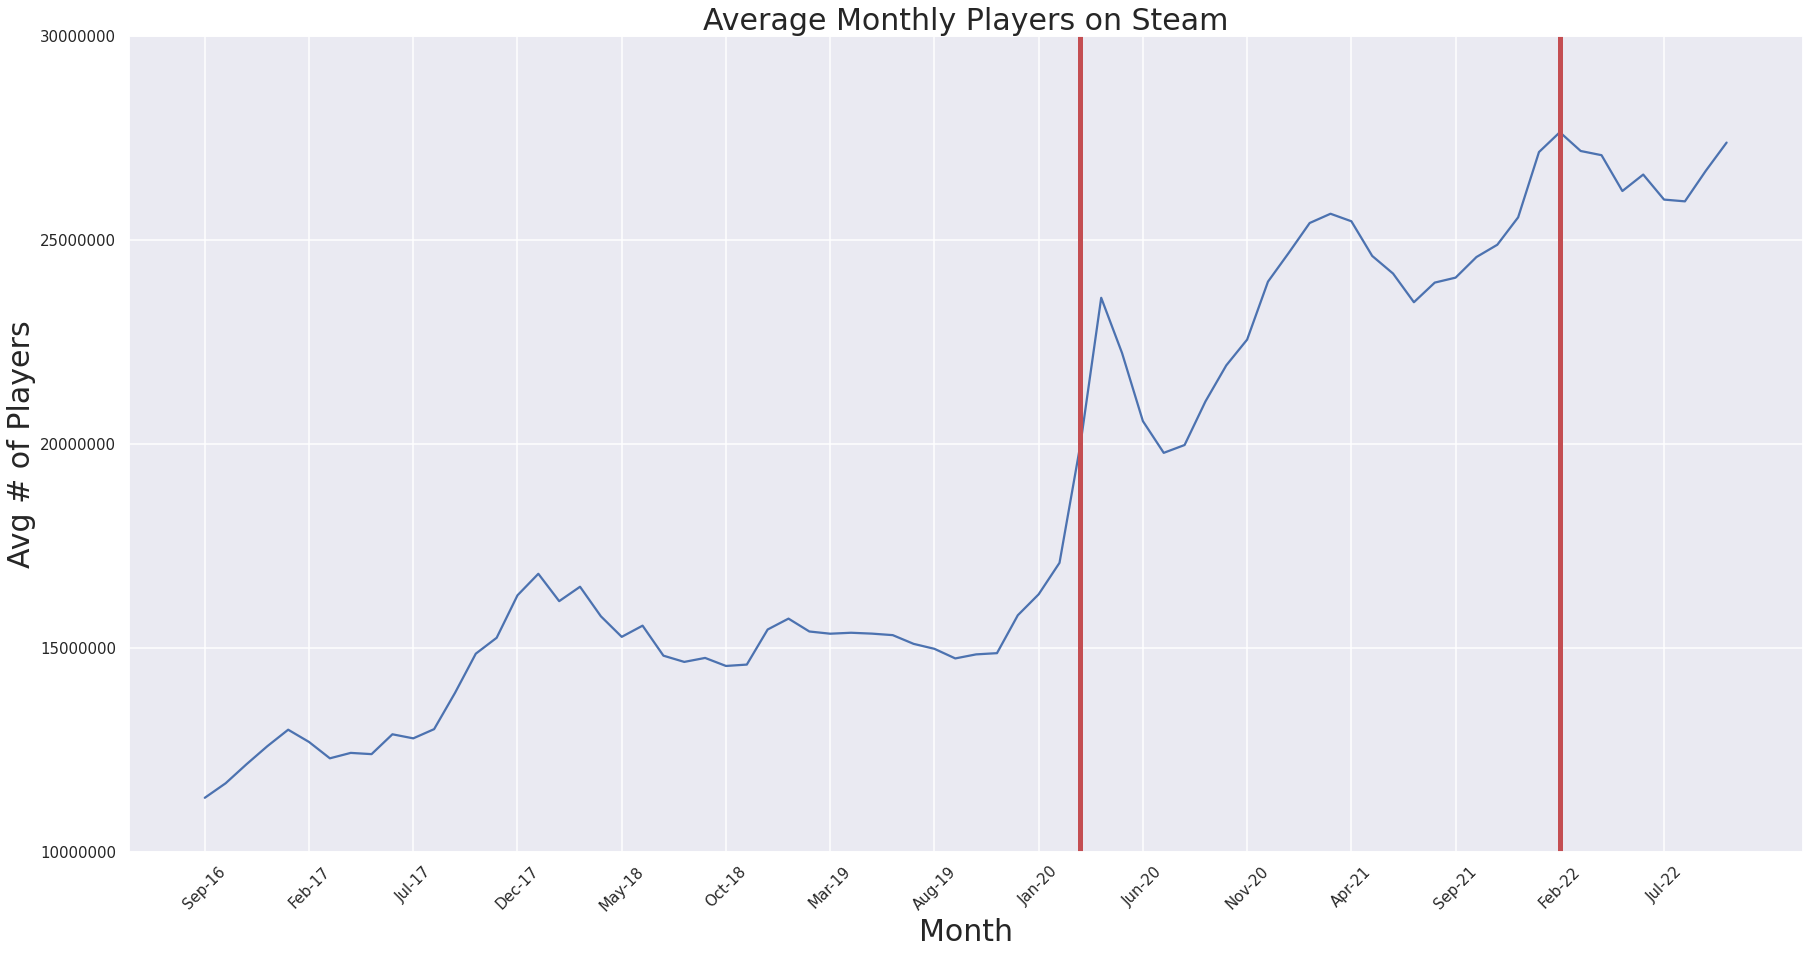

In [37]:
figSteam, ax = plt.subplots(figsize=(30,15))
sns.lineplot(data=SteamData, x='month', y='average_monthly_players', ax=ax)

plt.xlabel('Month', fontsize=30)
plt.ylabel('Avg # of Players', fontsize=30)
plt.title('Average Monthly Players on Steam', fontsize=30)

plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], fontsize=15, rotation=45)
plt.yticks([10000000, 15000000, 20000000, 25000000, 30000000], fontsize=15)

plt.axvline(SteamData[SteamData.month == 'Mar-20'].index, color='r', linewidth=5)
plt.axvline(SteamData[SteamData.month == 'Feb-22'].index, color='r', linewidth=5)

plt.show()

## Linear Regression on Average Monthly Players on Steam

Created Linear Regression Plot of the Average Monthly players on Steam by way of sns.regplot().

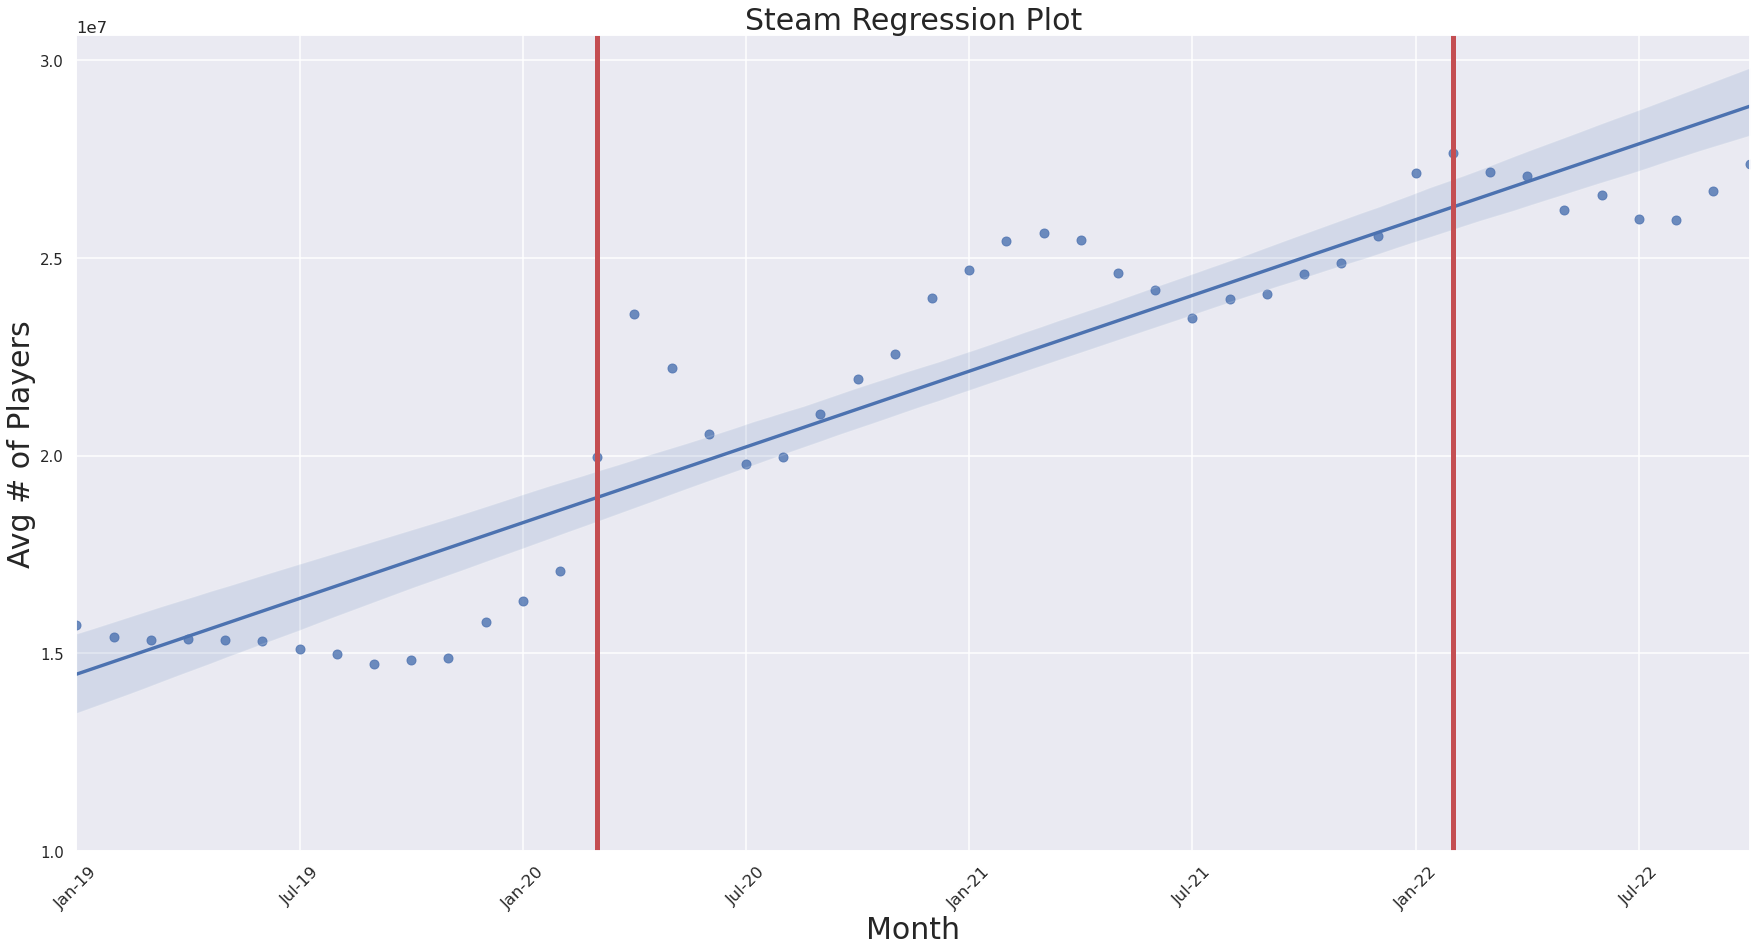

In [38]:
def steam_format_date(x, pos):
    return SteamData['month'][x]

steamRegFig, ax = plt.subplots(figsize=(30,15))
SteamRegressionPlot = sns.regplot(data=SteamData.iloc[28:,:], x=SteamData.index.tolist()[28:], y='average_monthly_players',  fit_reg = True, ax = ax)
ax.xaxis.set_major_formatter(steam_format_date)

plt.axvline(SteamData[SteamData.month == 'Mar-20'].index, color='r', linewidth=5)
plt.axvline(SteamData[SteamData.month == 'Feb-22'].index, color='r', linewidth=5)
plt.yticks([10000000, 15000000, 20000000, 25000000, 30000000], fontsize=15)
plt.xticks(np.arange(28,73,6),rotation=45)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Avg # of Players', fontsize=30)
plt.title('Steam Regression Plot', fontsize=30)

steamRegFig.show()

Ran Regression to see the slope of the line of best fit, indicated by the single entry under the coef column of the regression summary.

In [39]:
x = SteamData.reset_index()['index'][28:]
y = SteamData['average_monthly_players'][28:]
model = sm.OLS(y, x.values.astype(float))
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     average_monthly_players   R-squared (uncentered):                   0.990
Model:                                 OLS   Adj. R-squared (uncentered):              0.990
Method:                      Least Squares   F-statistic:                              4683.
Date:                     Thu, 08 Dec 2022   Prob (F-statistic):                    3.91e-47
Time:                             06:59:39   Log-Likelihood:                         -736.18
No. Observations:                       46   AIC:                                      1474.
Df Residuals:                           45   BIC:                                      1476.
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    

In [40]:
print(SteamData.loc[42])

month                         Mar-20
average_monthly_players     19974880
monthly_gain_loss          4,583,744
Name: 42, dtype: object


We also created a linear regression plot for a period prior to the one shown earlier of a similar length - to show a contrast between the growth on steam before covid and during covid.

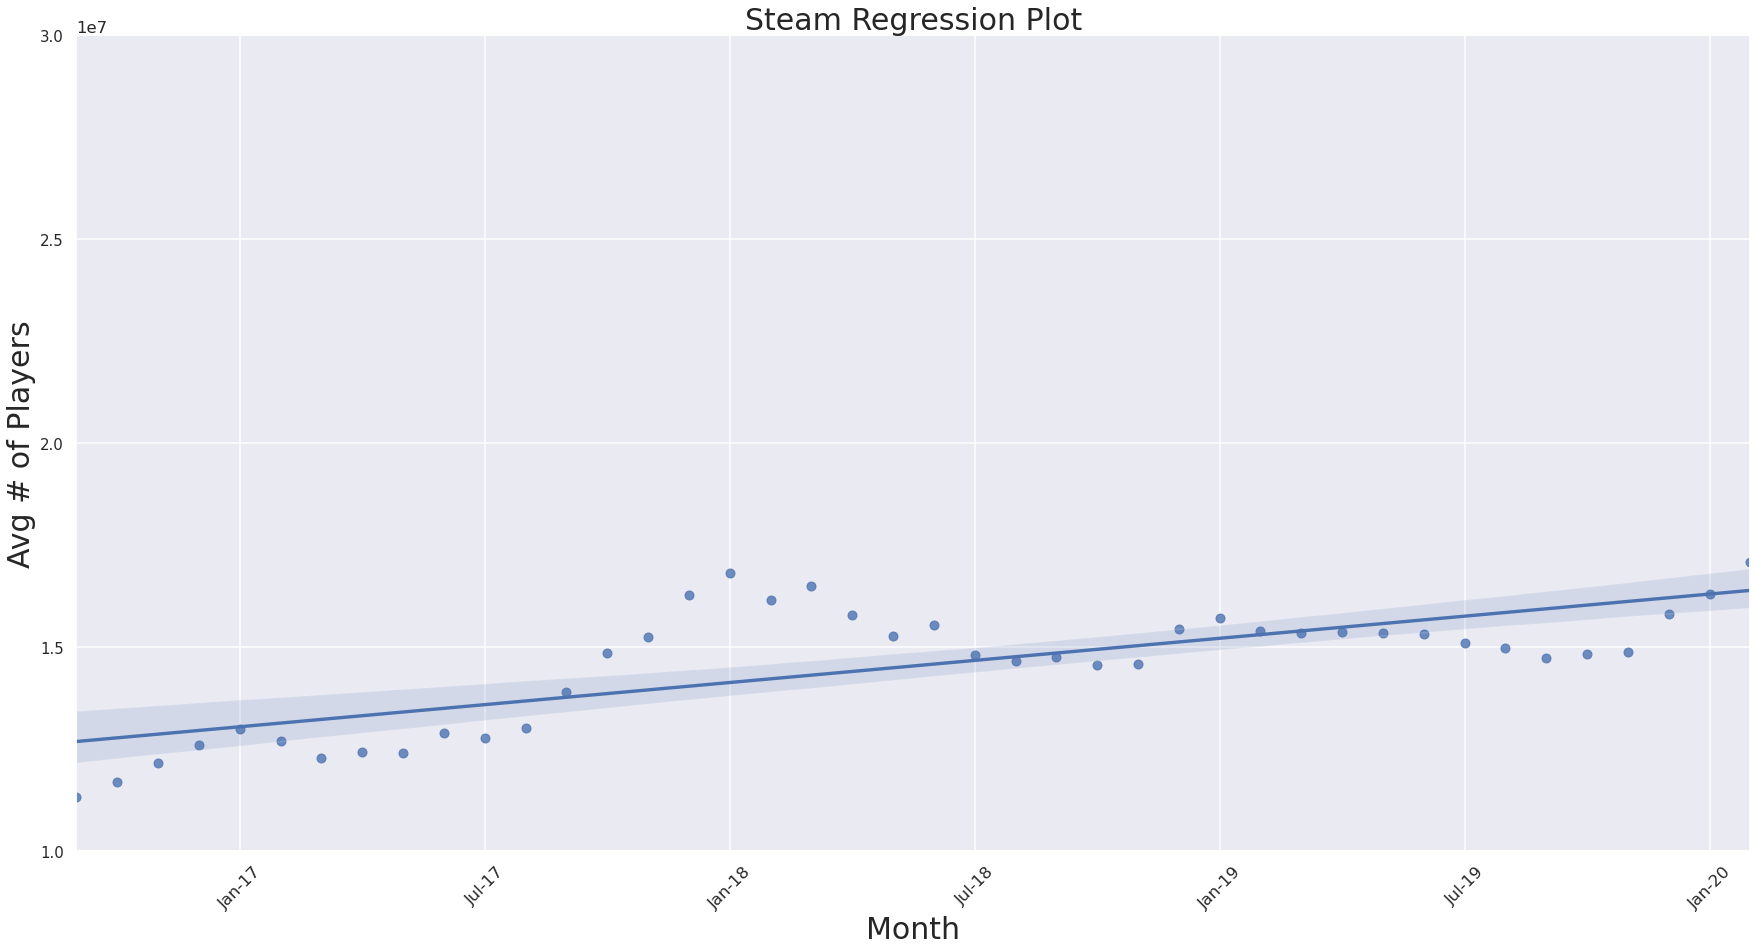

In [41]:
steamEarlyRegFig, ax = plt.subplots(figsize=(30,15))
SteamEarlyRegressionPlot = sns.regplot(data=SteamData.iloc[0:42,:], x=SteamData.index.tolist()[0:42], y='average_monthly_players',  fit_reg = True, ax = ax)
ax.xaxis.set_major_formatter(steam_format_date)

plt.yticks([10000000, 15000000, 20000000, 25000000, 30000000], fontsize=15)
plt.xticks(np.arange(4,42,6),rotation=45)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Avg # of Players', fontsize=30)
plt.title('Steam Regression Plot', fontsize=30)

steamEarlyRegFig.show()

Visually, it is fairly trivial to see that general user activity on Steam was fairly stagnant leading up to the start of the virus, but running the regression showed this trend even clearer. There is a definitive increase over time, as the positive coefficient of the line of best fit means that there is a significant increase in video game users on Steam over the course of the pandemic. This result shows that the pandemic may have increased online gaming and game-related virtual interactions. There do not seem to be any major outliers in this data and no confounding variables seem to have a large effect on the results. We can also visually see a difference in the comparison of the change in the two variables, as shown by the regression plot. We can see much more growth in the period containing COVID compared to the period prior to COVID, as shown by the drastically different slopes of the regression lines.

## EDA For Twitch Usage Data 
### Steps:
In order to plot this data, we created three graphs, one per column of data/relationship.

1. We first used Seaborn and plotted the values of the Average Viewer count over time, plotting the Average_Viewers data column against our time axis, months. 
2. We then repeated this process for the Average Channel data and the Hours Watched data in order to see the relationship of these values against time, giving us a total of three Twitch Data relationships with time.
3. For all three graphs, we put a line indication of where we approximated to be the height of quarantine, beginning March 2020 till February 2022.

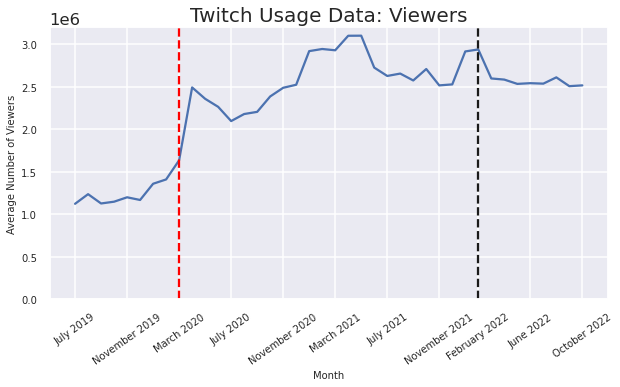

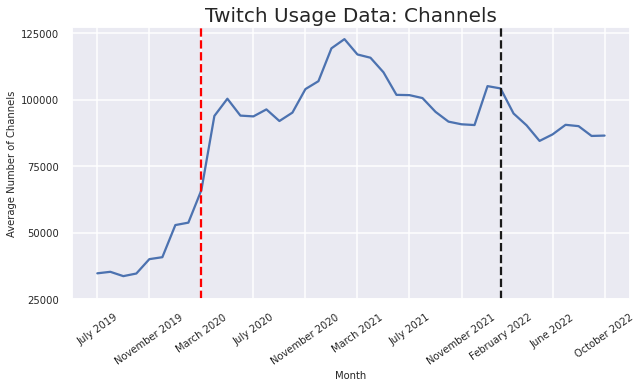

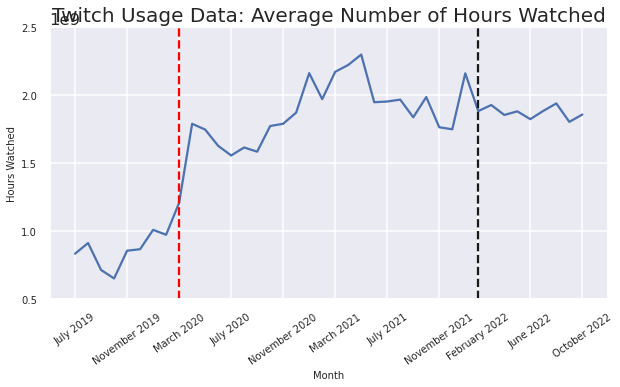

In [42]:
# Graph of Twitch Viewer Growth
f1, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = TwitchUsage2, x = 'Month', y = 'Average_Viewers') 
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Average Number of Viewers', fontsize = 10)
plt.title('Twitch Usage Data: Viewers', fontsize=20)

plt.xticks([0,4,8,12,16,20,24,28,31,35,39], fontsize=10,rotation=35)
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000,3000000],fontsize=10)

# Add lines to indicate time period of interest, March 2020-February 2022
plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'March 2020'].index, color = 'red', linestyle = '--')
plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'February 2022'].index, color = 'k', linestyle = '--')
plt.show()

#Graph of Twitch Channel Growth
f2, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = TwitchUsage2, x = 'Month', y = 'Average_Channels')
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Average Number of Channels', fontsize = 10)
plt.title('Twitch Usage Data: Channels', fontsize=20)

plt.xticks([0,4,8,12,16,20,24,28,31,35,39], fontsize=10,rotation=35)
plt.yticks([25000,50000,75000,100000,125000],fontsize=10)

plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'March 2020'].index, color = 'red', linestyle = '--')
plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'February 2022'].index, color = 'k', linestyle = '--')
plt.show()

#Graph of Twitch Number of Hours Watched Growth
f3, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = TwitchUsage2, x = 'Month', y = 'Hours_Watched')
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Hours Watched', fontsize = 10)
plt.title('Twitch Usage Data: Average Number of Hours Watched', fontsize=20)

plt.xticks([0,4,8,12,16,20,24,28,31,35,39], fontsize=10,rotation=35)
plt.yticks([500000000,1000000000,1500000000,2000000000,2500000000],fontsize=10)

plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'March 2020'].index, color = 'red',linestyle = '--')
plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'February 2022'].index, color = 'k', linestyle = '--')
plt.show()

As is in all of our data sets, a linear relationship approach was used for the Twitch data plots. This is because we evaluated one aspect of a data set with respect to time, and a line plot would allow us to see the trend of values as it pertains to a certain time period. In the Twitch data, for all three data sets (Average Viewers, Average Channels, Hours Watched) there was a large spike of increase around March 2020, which is the beginning of the pandemic and when quarantine began. From that point onwards the values of all three data sets are increasingly higher and higher, and begin to level off at a value much higher than before the pandemic. This suggests that Covid and the lockdown had a positive influence on overall usage of Twitch.

## Linear Regression Plots for Twitch Data
### Steps: 
1. First, a function was created to convert the Months column in our data frame to index values because Linear Regression relationships require numerical values. 
2. We then created a regression plot using the Twitch Data, beginning at indexes that correlate with our above indicated timeline of interest between March 2020 and February 2022.
3. We made sure to convert our months into index values in order to be used in the linear regression
4. Again, we plotted vertical lines indicating the time period of interest between March 2020 and February 2022

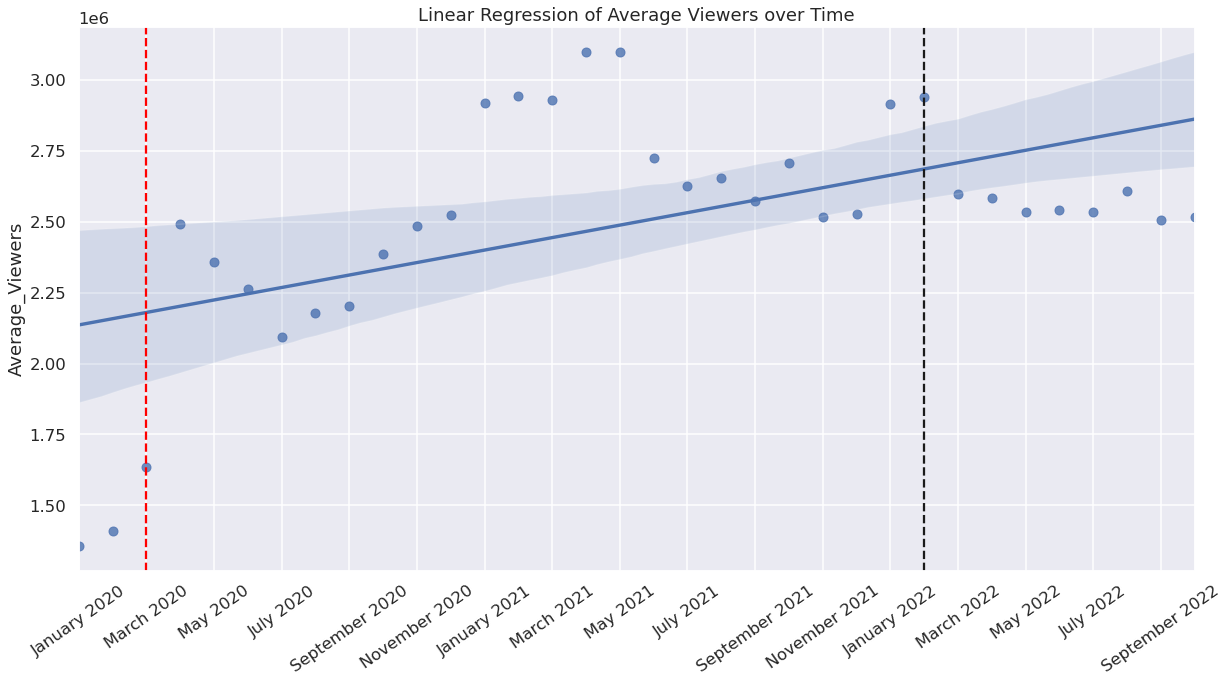

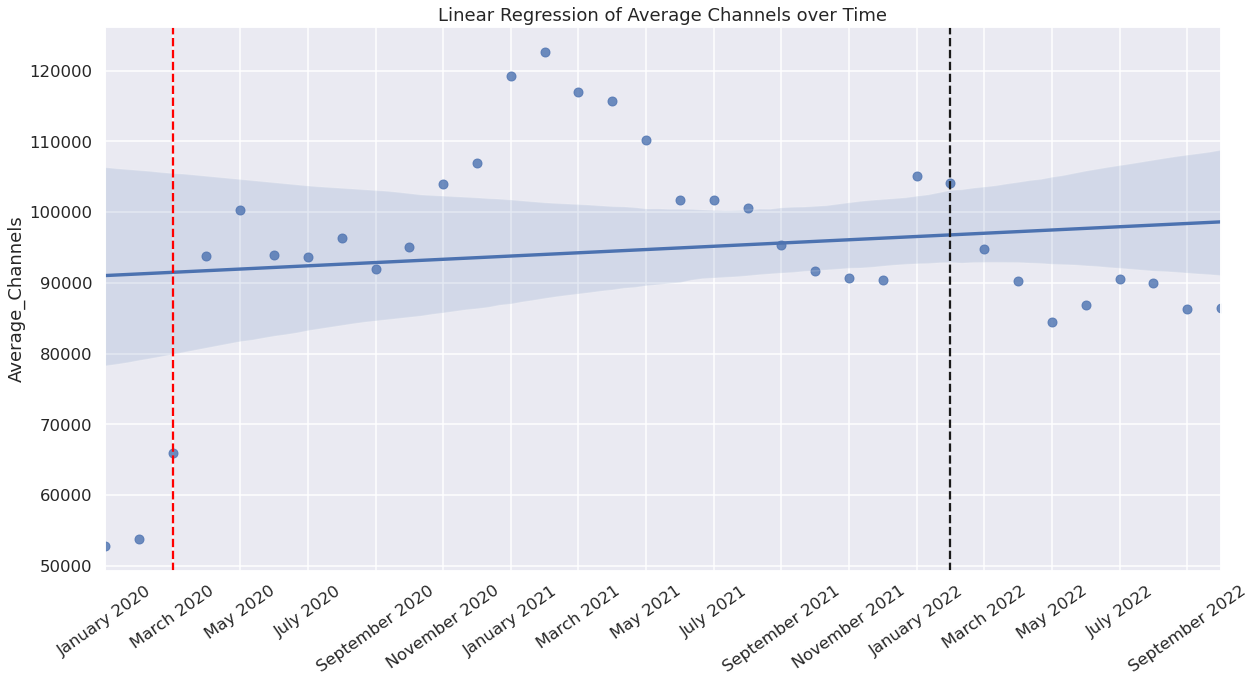

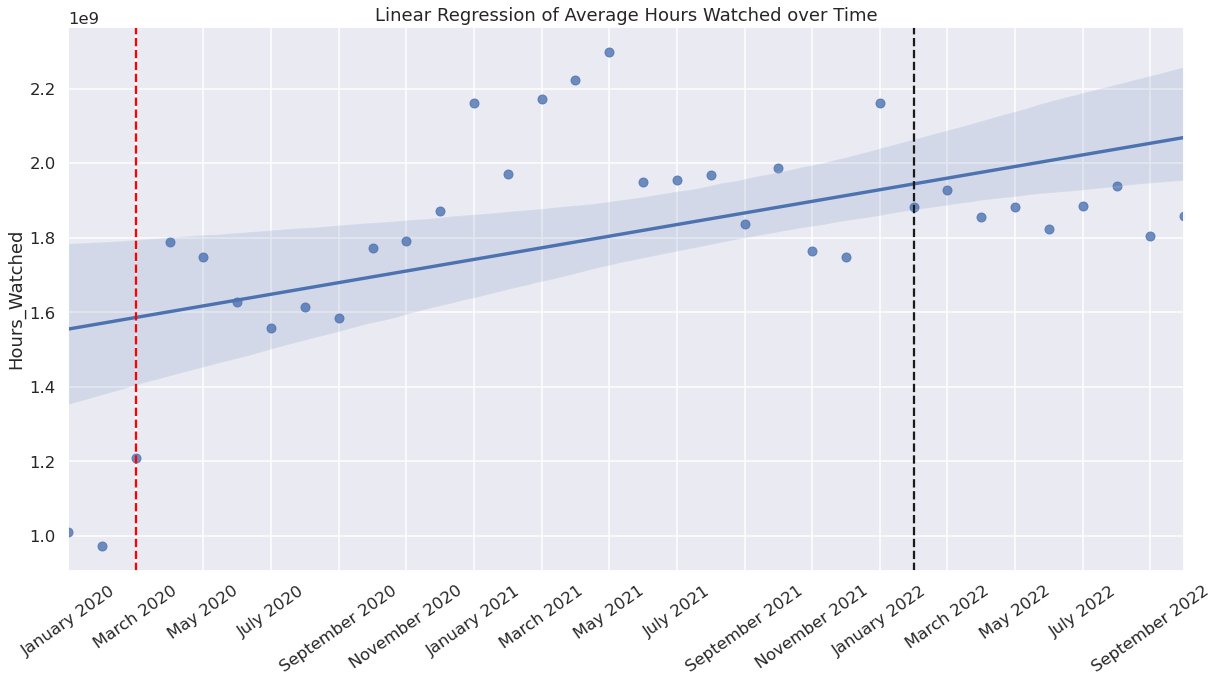

In [43]:
#Regression Visualization
def convert_Twitch_Months(x, pos):
    return TwitchUsage2['Month'][x]

figure1, ax = plt.subplots(figsize=(20,10))
regression1 = sns.regplot(data = TwitchUsage2.iloc[6:,:], x=TwitchUsage2.index.tolist()[6:], y='Average_Viewers',  fit_reg = True, ax = ax)
ax.xaxis.set_major_formatter(convert_Twitch_Months)
plt.title('Linear Regression of Average Viewers over Time')
plt.xticks(np.arange(6,39,2),rotation=35)


plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'March 2020'].index, color = 'red',linestyle = '--')
plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'February 2022'].index, color = 'k', linestyle = '--')

figure2, ax = plt.subplots(figsize=(20,10))
regression2 = sns.regplot(data = TwitchUsage2.iloc[6:,:], x=TwitchUsage2.index.tolist()[6:], y='Average_Channels',  fit_reg = True, ax = ax)
ax.xaxis.set_major_formatter(convert_Twitch_Months)
plt.title('Linear Regression of Average Channels over Time')
plt.xticks(np.arange(6,39,2),rotation=35)

plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'March 2020'].index, color = 'red',linestyle = '--')
plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'February 2022'].index, color = 'k', linestyle = '--')

figure3, ax = plt.subplots(figsize=(20,10))
regression3 = sns.regplot(data = TwitchUsage2.iloc[6:,:], x=TwitchUsage2.index.tolist()[6:], y='Hours_Watched',  fit_reg = True, ax = ax)
ax.xaxis.set_major_formatter(convert_Twitch_Months)
plt.title('Linear Regression of Average Hours Watched over Time')
plt.xticks(np.arange(6,39,2),rotation=35)


plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'March 2020'].index, color = 'red',linestyle = '--')
plt.axvline(TwitchUsage2[TwitchUsage2.Month == 'February 2022'].index, color = 'k', linestyle = '--')




After performing linear regression on the Twitch Usage data, we saw a unanimously positive trend over time in all three sets of data: Average Viewers, Average Channels, and Hours Watched. This can be seen in the linear regression plots above, as they all produce a positive linearly upwards slope. There do not seem to be any noticeable outliers in any of the three plots. 

## Linear Regression Tables for Twitch Data
### Steps: 
1. Using the statistics model formula package, an ordinary least squares regression was computed. 
2. This was repeated for all three data columns for Twitch data, so that a linear regression was produced for Average Viewers, Average Channels, and Hours Watched.

### Average Viewers Linear Regression

In [44]:
# Linear Regression Tables 
# For Average Viewers
mod1 = smf.ols(formula='index ~ Average_Viewers', data=TwitchUsage2)
res1 = mod1.fit()
print(res1.summary())


                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     47.78
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           3.23e-08
Time:                        06:59:43   Log-Likelihood:                -138.32
No. Observations:                  40   AIC:                             280.6
Df Residuals:                      38   BIC:                             284.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.7018      4.906     

### Average Channels Linear Regression

In [45]:
#For Average Channels
mod2 = smf.ols(formula='index ~ Average_Channels', data=TwitchUsage2)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     19.25
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           8.79e-05
Time:                        06:59:43   Log-Likelihood:                -146.40
No. Observations:                  40   AIC:                             296.8
Df Residuals:                      38   BIC:                             300.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.5634      5.445  

### Hours Watched Linear Regression

In [46]:
#For Hours Watched
mod3 = smf.ols(formula='index ~ Hours_Watched', data=TwitchUsage2)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     46.00
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           4.86e-08
Time:                        06:59:43   Log-Likelihood:                -138.74
No. Observations:                  40   AIC:                             281.5
Df Residuals:                      38   BIC:                             284.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.9287      4.823      1.229

After plotting the linear regression graphs, we ran an OLS regression for all three sets of Twitch Data: Average Viewers, Average Channels and Hours Watched. Using the p-values in our OLS regression, each scenario has a p-value that is less that an alpha of 0.01: Average_Viewers(P>|t|)= 0.000, Average_Channels(P>|t|)= 0.000, Hours_Watched(P>|t|)= 0.000. Because these values are less than 0.01, we can reject the null hypothesis which states that the influence of the pandemic time period on the Average Viewers, Average Channel, and Hours Watched negligible. 

When looking at our OLS results, we can also observe the slopes (coefficients) generated in the regression for all three sets of relationships. For Average Viewers, Average Channels, and Hours Watched, we see regression coefficients of 1.4207e-05, 0.0003, and 1.901e-08 respectively. These positive value slopes futher support the visually positive linear correlation of our plots of these three relationships in relation to time. 

With these observations, we can accept that the pandemic had a positive influence on these values of Twitch Data, and interactions among people in the online streaming community had increased as a result of the quarantine. At this time, there are not any other obvious factors that would have caused this dramatic increase in Twitch engagement. 



## EDA for Multiplayer Video Games Data

We performed EDA on both our merged data by doing the following:
1. We first used Seaborn to create a lineplot where we were able to see if there were any trends in the data for both the average monthly players for each game as well as the monthly gains/losses for each game. We plotted all of the data on the same axis and then we isolated the data from the dates March 2020-March2022 by creating vertical red lines because that is the data we are mostly concerned with, as that was at the peak of the pandemic. This is so we can easily see the data that we need to perform analysis on more easily. 
2. We also created a panel of lineplots, where each panel represents the lineplot for the average monthly players for each game. This is so that we can see more of the trend of each game in terms of how much the average monthly players grew over time. We again divided the data by drawing the vertical red lines at where we want to focus our analysis on. 
3. We created a scatterplot of the monthly gain/losses percentages for each game so that we could perform linear regression on that data. We did not choose to do linear regression on the average monthly players or monthly gain/loss because we believed that the variance in the number of players for each game was too high and thus would skew the results since the number of players for each game was not relative to other games, so even if there was an increase in the games, if some games had a lower average monthly players than the other games, the line would show as a decrease because of the difference. 
4. After plotting, we used sm.OLS() function to find the slope of the regression line. 
5. We plotted monthly gain/loss percentages with a linear regression function lineplot to see the linear regression line for the data.

## Average Monthly Players for Multiplayer Games

Created line graph for average monthly players for every game. We wanted to see the trend of how the average monthly players grow over time.

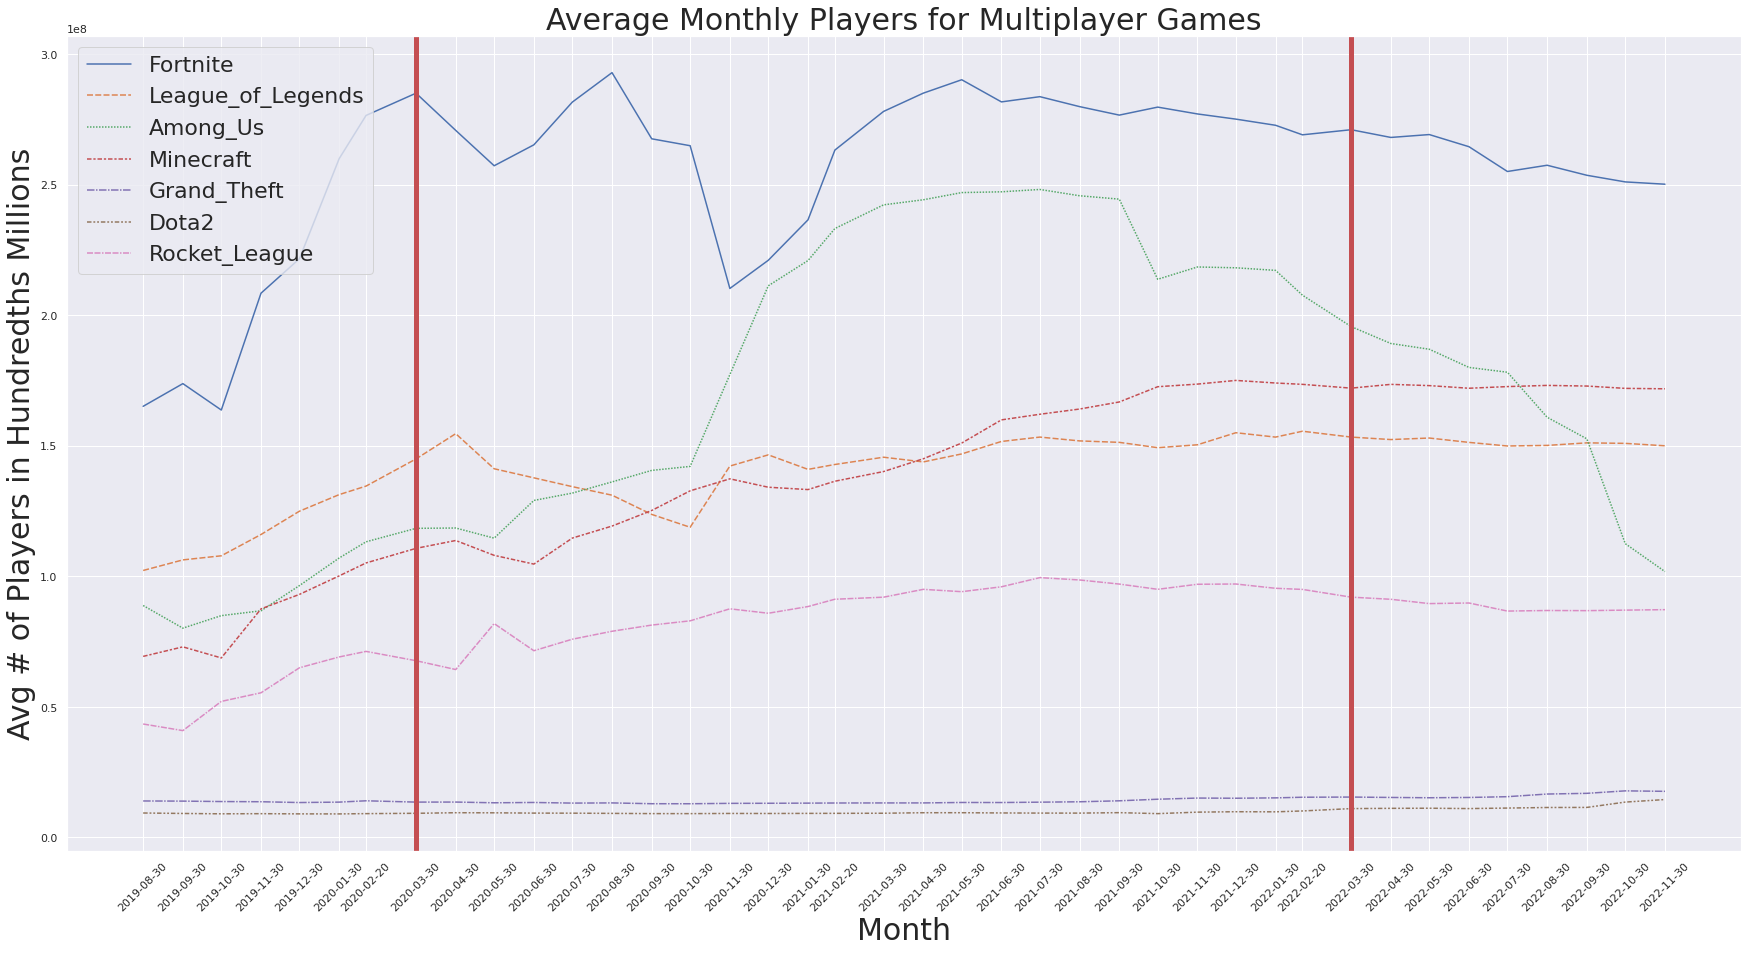

In [47]:
sns.set(rc={'figure.figsize':(30,15)})
plt.title('Average Monthly Players for Multiplayer Games', fontsize=30)
sns.set(font_scale=2)
f1 = sns.lineplot(data=average_monthly)
f1.set(xticks=average_monthly.index.values)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Avg # of Players in Hundredths Millions', fontsize=30)
plt.xticks(rotation = 45)
plt.axvline(dt.datetime(2020, 3, 30), color ='r', linewidth=5)
plt.axvline(dt.datetime(2022, 3, 30), color ='r', linewidth=5)
plt.show()

We observe an overall increasing trend for each of the games. Even there are a few games that have a more stagnant change (like Grand Theft Auto V and Rocket League), we have more insight on a positive growth of the number of players over time during the COVID-19 pandemic. This hints to us that it might be likely there were more people playing multiplayer games during the COVID-19 pandemic.

## Average Monthly Gain/Loss for Multiplayer Games

Created a line graph for monthly gain/loss for every game to view the overall trend in the change in the monthly number of average players.

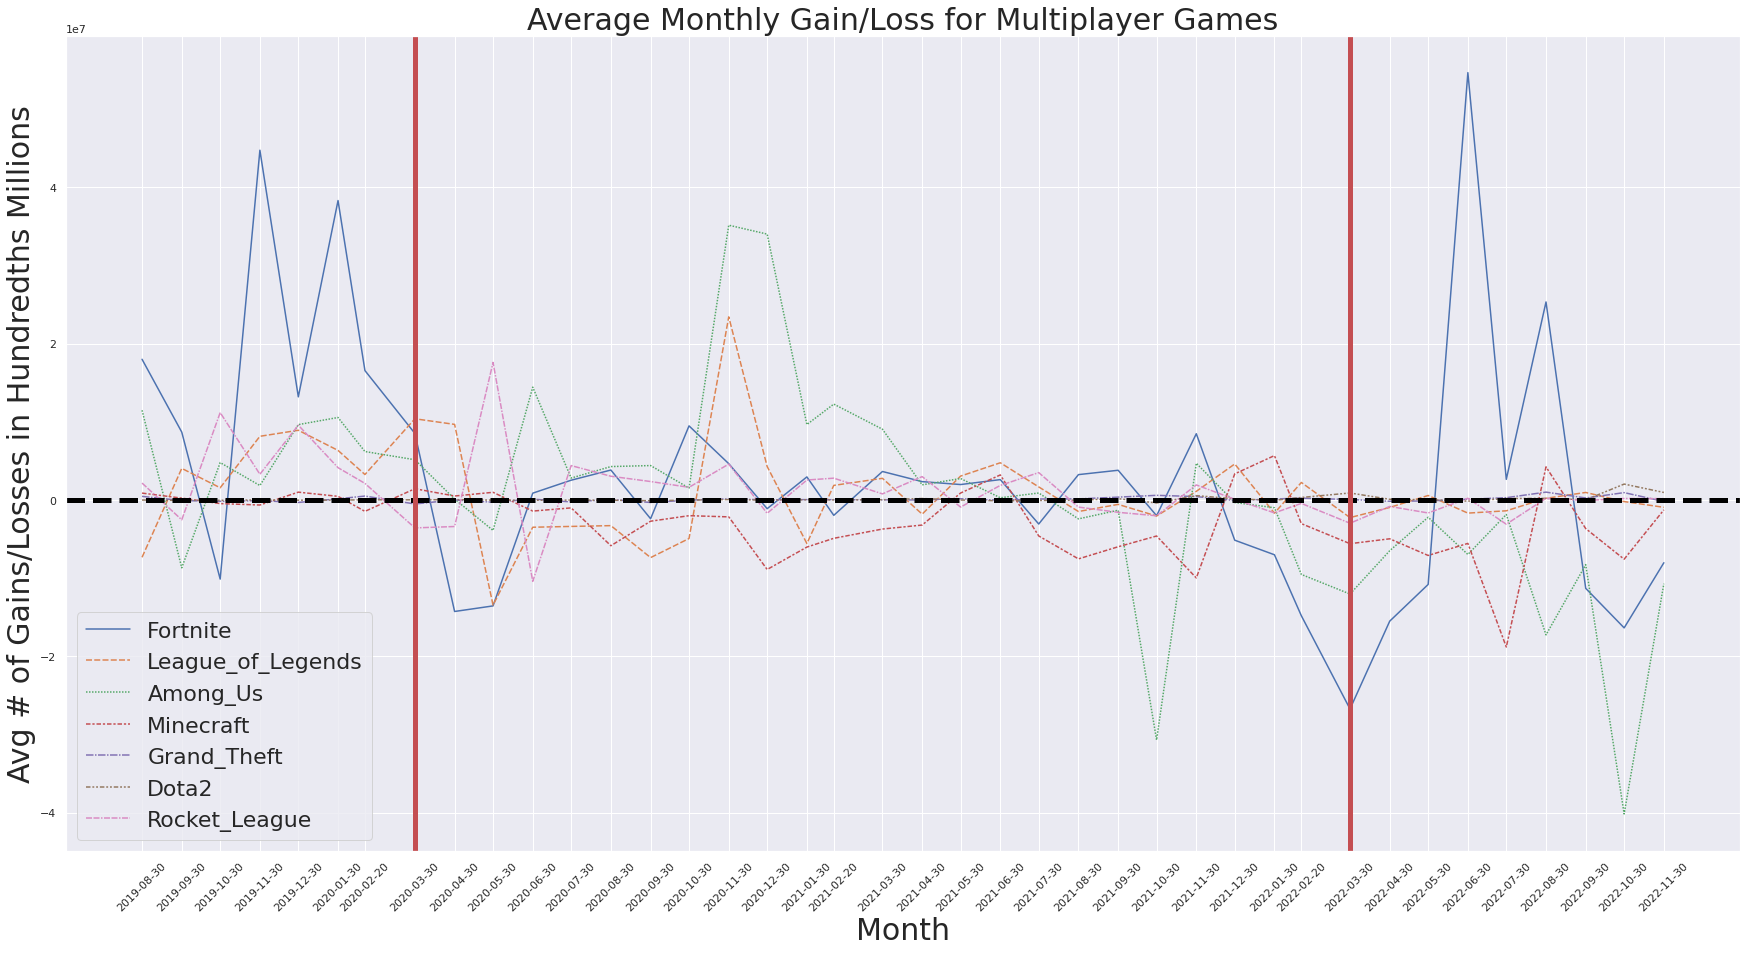

In [48]:
sns.set(rc={'figure.figsize':(30, 15)})
plt.title('Average Monthly Gain/Loss for Multiplayer Games', fontsize=30)
sns.set(font_scale=2)
f2 = sns.lineplot(data=monthly_gain_loss)
f2.set(xticks=monthly_gain_loss.index.values)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Avg # of Gains/Losses in Hundredths Millions', fontsize=30)
plt.xticks(rotation = 45)
plt.axhline(y=0, color ='black', linewidth=5, linestyle='dashed')
plt.axvline(dt.datetime(2020, 3, 30), color ='r', linewidth=5)
plt.axvline(dt.datetime(2022, 3, 30), color ='r', linewidth=5)
plt.show()

Here we see a slightly greater number of positive gains, by noticing more peaks that occur above zero. Nevertheless, we noticed significant number of peaks below zero which indicate losses. This line plot gaves us a vary interepretation of whether there could be more gains or losses., This could tell us that even if there is an overall increase or decrease, we would observe a weak one.

## Linear Regression on Average Monthly Gain/Loss Percentage for Multiplayer Games

We decided to use linear regression to get a deeper insight on the overall change in the number of average monthly  players and the strength of the correlation. Average Monthly Gain/Loss Percentage was chosen to run this regression on because this variable represents a relative change which standardizes the number of players for each game. We noticed that the difference in players for a game with a large number of players versus a game with a smaller number of players is difficult to analyze. Hence, we use percentage which would take the relative change.

First, we will analyze the the scatterplot of the Average Monthly Gain/Loss Percentage that includes all the multiplayer games we are using in this project in order to do a descriptive analysis.

We created a function to convert the index numbers on the axis to dates.

In [49]:
# formats the index to its corresponding date
def format_date(x, pos):
    if 0 <= x <= 174:
        return '{:%Y-%m}'.format(pd.to_datetime(monthly_gain_loss_together['month'][x]).date())

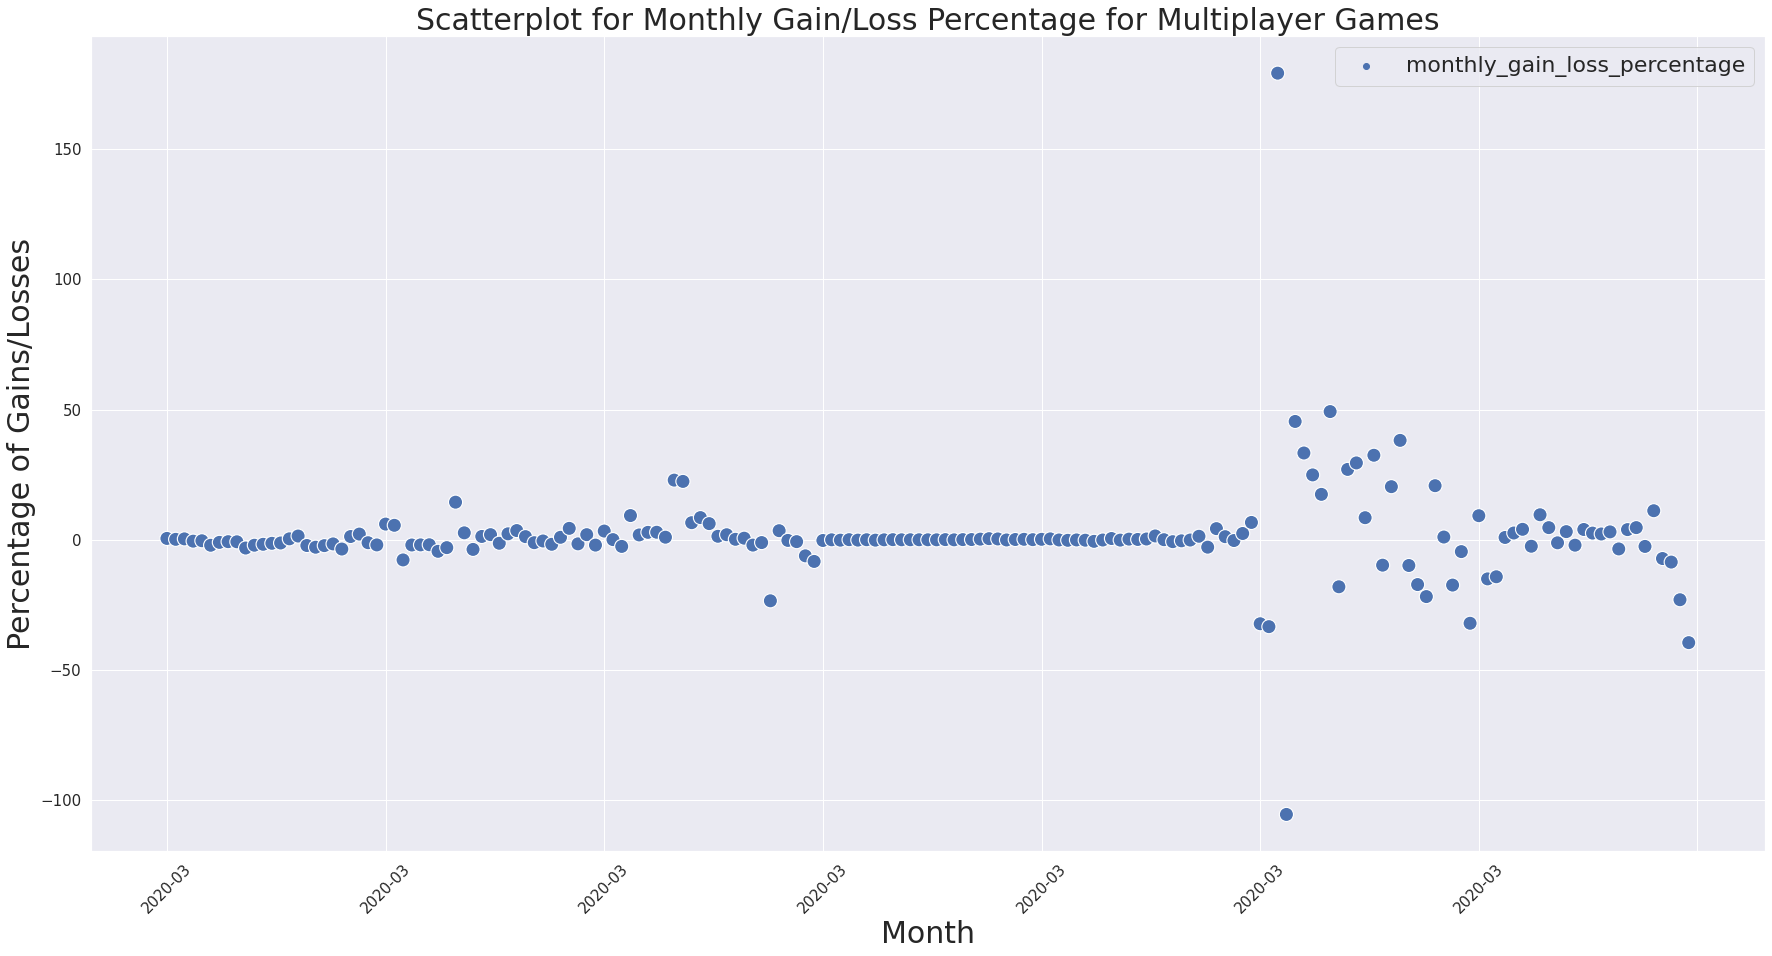

In [50]:
fig1, ax1 = plt.subplots()
sns.set(rc={'figure.figsize':(30, 15)})
sns.set(font_scale=2)
plt.title('Scatterplot for Monthly Gain/Loss Percentage for Multiplayer Games', fontsize=30)
plt.ylabel('Percentage of Gains/Losses', fontsize=30)
plt.xlabel('Month', fontsize=30)
plt.xticks(fontsize=15, rotation = 45)
plt.yticks(fontsize=15)
sns.scatterplot(data=monthly_gain_loss_percentage_together, s=200)
ax1.xaxis.set_major_formatter(format_date)

Here we see very stagnant changes. There are positive increases as well as negative ones. This tells us that regardless of a positive or negative overall change, it seems to be a relatively weak one. To get more insight, we run a linear regression model.

Created a linear regression model to find the coefficient between the 2 variables 

In [51]:
x = monthly_gain_loss_percentage_together.reset_index()['index']
y = monthly_gain_loss_percentage_together['monthly_gain_loss_percentage']
model = sm.OLS(y, x.values.astype(float))
results = model.fit()
print(results.summary())

                                      OLS Regression Results                                     
Dep. Variable:     monthly_gain_loss_percentage   R-squared (uncentered):                   0.005
Model:                                      OLS   Adj. R-squared (uncentered):             -0.001
Method:                           Least Squares   F-statistic:                             0.9106
Date:                          Thu, 08 Dec 2022   Prob (F-statistic):                       0.341
Time:                                  06:59:48   Log-Likelihood:                         -766.01
No. Observations:                           175   AIC:                                      1534.
Df Residuals:                               174   BIC:                                      1537.
Df Model:                                     1                                                  
Covariance Type:                      nonrobust                                                  
                 coe

Graphed the linear regression line between months and gains and losses for all the games.

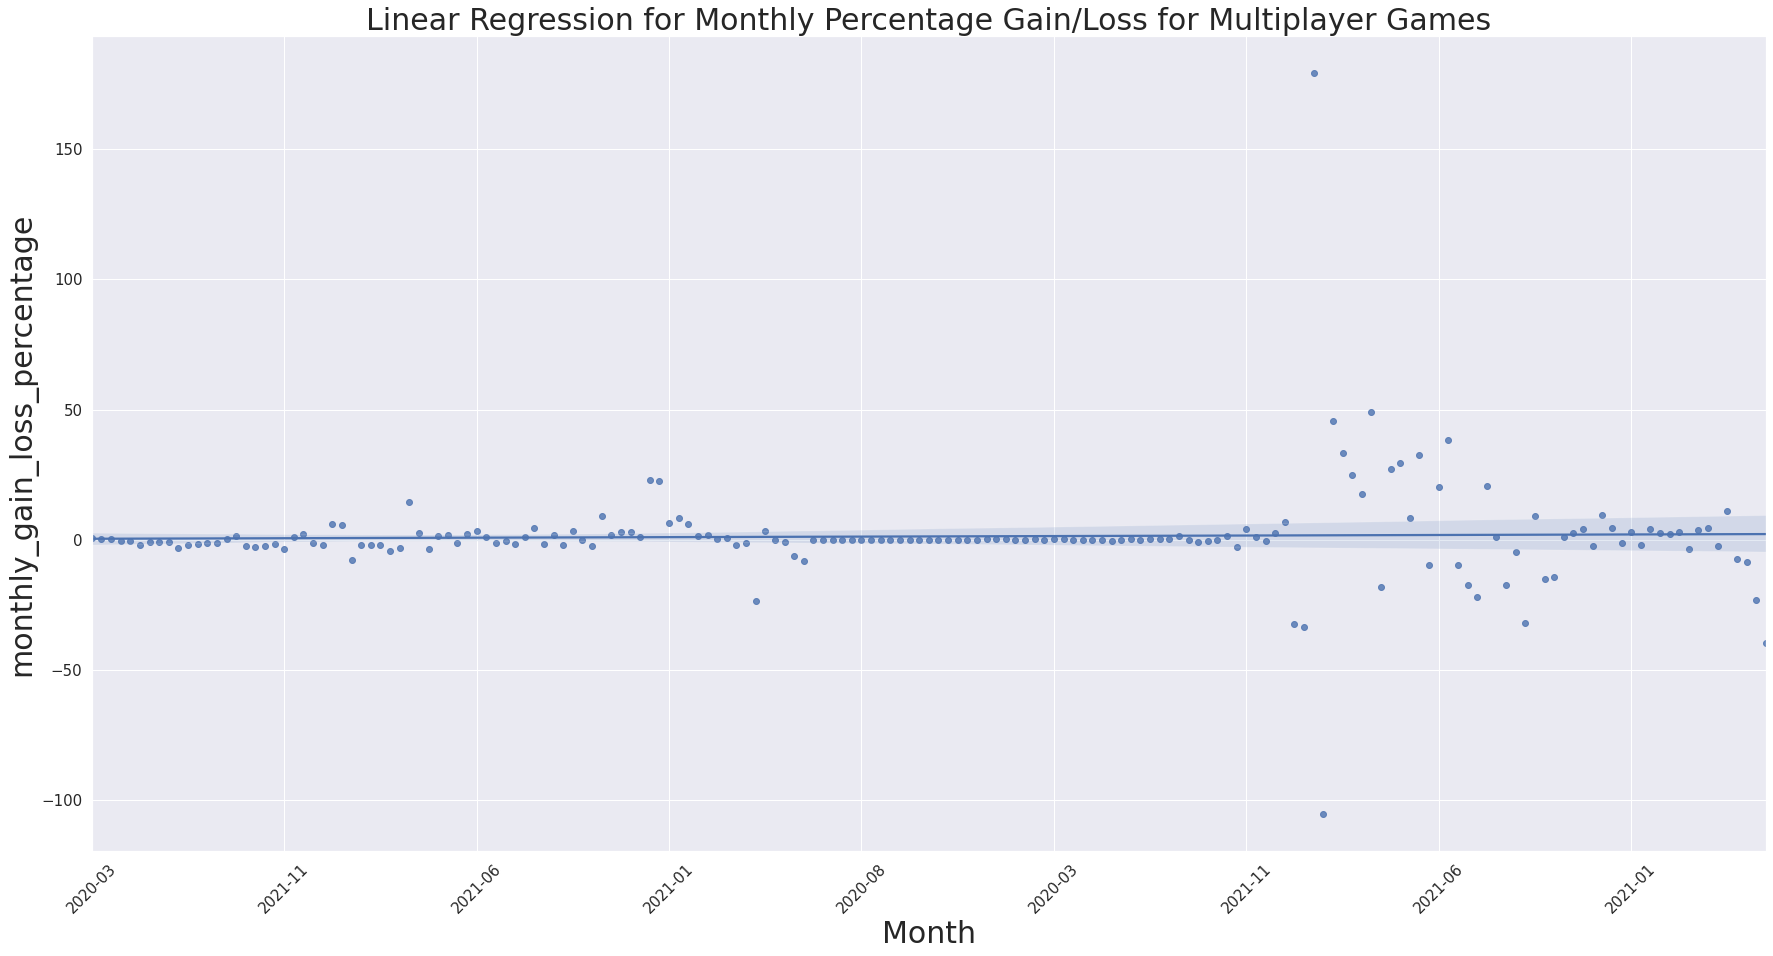

In [52]:
fig1, ax = plt.subplots()
plt.title('Linear Regression for Monthly Percentage Gain/Loss for Multiplayer Games', fontsize=30)
plt.ylabel('Percentage of Gains/Losses', fontsize=30)
plt.xlabel('Month', fontsize=30)
plt.xticks(fontsize=15, rotation = 45)
plt.yticks(fontsize=15)
ax.set_xlim([0, 174])
reg_plot1 = sns.regplot(data=monthly_gain_loss_percentage_together, x=monthly_gain_loss_percentage_together.index.tolist(), y='monthly_gain_loss_percentage', fit_reg=True, ax=ax)
ax.xaxis.set_major_formatter(format_date)

We noticed that there is a positive correlation, as seen on the above linear regression plot. The OLS Regression Results generated a 0.0119 slope, which further supports the positive correlation from our plot. Nevertheless, there is a standard error of 0.015, which tells us these results might have confounding variables affecting it. Possible confounding variables can include the times where schools are in and not in session, updates to these multiplayer games, and many more.

# Ethics & Privacy

We believe that everything in our research process, from data collection to analysis, has been ethically conducted and minimally biased. The question we investigated involves making an inference about the behavior of gamers worldwide. Although this involves a sizable population that is prone to sampling bias, the data we used are globally-sourced and thorough. The main reason there may be more data from some geographical regions than others is because there are simply more multiplayer gamers and game statistics from those regions. To mitigate bias from the games we source our data from, we looked at statistics from the most widely used gaming engine, one of the most popular game streaming services, and five of the most popular multiplayer games in the world. A notable limitation is that we do not include data from players or viewers who choose to keep their statistics private. Out of technicality and with respect to their privacy, we cannot include their data in this research. Overall, we address the limitations through the investigation of multiple sufficient metrics to assess online interactions from both gameplay and viewership.

Importantly, there are no privacy concerns. The data was only collected from individuals who have consented for their anonymous gaming data to be open and usable in the public sphere. Their privacy is further protected by our sources: Steam, Twitch, and games with no history of data leaks or unethical use. No information about any individual’s identity is available in the datasets because unique identifiers are detached from entries and we only have access to global totals and averages. Lastly, this study will be conducted purely for academic reasons and we do not intend to profit from the results and conclusions.

# Conclusion & Discussion

We had originally hypothesized that the COVID pandemic would greatly affect the use of online multiplayer games and socialization online, and our analysis shows this. Our data varies from showing general data for the consumption of online media and a more specific analysis of data on a per game basis, looking at the changes in consumption over time. Our data generally shows a drastic increase in video game and stream consumption. Not only does our data support a significant change during the COVID pandemic, but our data also supports that growth accelerated during the pandemic. The game data supports a general change in socialization online since greater consumption of games means there are more people collaborating or competing, implying significant changes in online socialization. The Twitch stream data supports this as well, as the increase in consumption of Twitch streams implies more people chatting in Twitch chats and the streamer interacting with more people for longer periods of time.

The main limitation for this project was the availability of data sources for explicit interaction between people - the majority of the data we used implies an increase in socialization but is not a direct source of this conclusion. For example, data on explicit Twitch chat history or the amount of people using the game communications platform Discord are not readily available in a detailed format, meaning these potential explicit sources of supporting data were not available for us to utilize. This could have potentially led to more concrete final conclusions, or allowed us to simply have additional sources of explicit data to work with. However, our group was still able to make meaningful conclusions with the data that was available.

The potential effect of our project on general society is as a show of evidence where we are going as a society in a social regard. We have been entering a digital age for some time, and the COVID pandemic only further emphasized that change in our society. More people are resorting to online activities for leisure and are spending more time online just to interact with people they know, or even with people they don't know. People are also now spending more time absorbing media and interacting with strangers, in the form of Twitch and other platforms available with similar services. In the case of another future pandemic or similar situation like COVID, we can use the data gathered from this project to understand that we need to focus a lot of our resources to develop multiplayer games and maintain sites such as Twitch, so that we can continue to have a place for socialization for when it is not a physical possibility.

# Team Contributions

**Adrian Botvinik:** Topic Idea, Data Collection and Cleaning (Steam), EDA (Steam), Analysis of Data (Steam), Conclusion and Discussion, Video Prep

**Sujal Nahata:** Data Collection and Cleaning (Steam), EDA (Steam), Analysis of Data (Steam), Ethics, Conclusion and Discussion, Video Prep

**Parisa Shahabi:** Data Collection and Cleaning (Twitch), EDA (Twitch), Analysis of Data (Twitch), Conclusion and Discussion, Video Prep

**Belinda Yan:** Data Collection and Cleaning (Games), EDA (Games), Analysis of Data (Games), Video Prep and Production

**Jennifer Wong:** Data Collection and Cleaning (Games), EDA (Games), Analysis of Data (Games), Video Prep and Production